#  Task 4.10 

#### Contents
1.Import Libraries and Data
2.Data Privacy (PII) 
3.Create Regions 
4.Create Customer Profiles (Age,Income,Family/Marital status, Dependants, Baby, Pet, and Alcohol)
5.Create Department Profiles(Age,Income,Family/Marital status, Dependants, Baby, Pet, and Alcohol)
6. Create Comparison Visualizations Region Distributions, Order Frequency, Price Range Distributions
7. Create General Visualizations
8. Export final Dataset(s)

### Task 4.10 Part 1 


In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define Path

path = r'C:\Users\dolson\OneDrive - BEACON TECHNOLOGIES\Desktop\Instacart Basket Analysis 10.2022'

In [3]:
# Import latest version of merged dataset

df_final_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
df_final_data.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_final_data.shape

(32404859, 32)

# Data Privacy (PII)

###  Q2. Consider any security implications in data.  address PII data before continuing with analysis

Dataframe df_final_data contains data that is considered PII (security implications) the customer first and last name. These columns will be dropped from data frame. 

In [6]:
# Check columns to identify PII** First and Last Names are a common source 

df_final_data.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_previous_order',
       'Frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [7]:
# Drop first and last name columns for privacy 
df_final_data.drop(columns = {'first_name'}, inplace = True)

In [8]:
# Drop last name column
df_final_data.drop(columns = {'last_name'}, inplace = True)

In [9]:
# Check output after dropping columns
df_final_data.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_since_previous_order,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Create Regions: Northeast, Midwest, South, West

### Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. Create a "Region" column based on the "State" column from data set.

Use the region information in the Wikipedia article to create column(you only need regions, not divisions).

In [10]:
# Create a "Region" coloumn based on "State" column
        
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [11]:
# Create regional flag 

df_final_data.loc[df_final_data['state'].isin(Northeast), 'region']='Northeast'
df_final_data.loc[df_final_data['state'].isin(Midwest), 'region']='Midwest'
df_final_data.loc[df_final_data['state'].isin(South), 'region']='South'
df_final_data.loc[df_final_data['state'].isin(West), 'region']='West'

In [12]:
# Check if row size correct - Yes it is 
df_final_data['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Q3A Determine spending habits between U.S. regions (Hint: You can do this by crossing the varialbe you just created with the spending flag.)

In [13]:
#Creating a crosstab to compare region and spending flag
crosstab = pd.crosstab(df_final_data['region'], df_final_data['spending_flag'], dropna = False)                       

In [14]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


In [15]:
# Number of states per region
df_final_data.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [16]:
# Number of customers by region

df_final_data.groupby('region')['user_id'].nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

Answer Determine Spending Habits: South region has the most spenders for both the high and low categories.  The south region does have more states and then inclined to have more customers.

### Q4.  The instacart CFO is not interested in cusotmers who don't generate much revenue for app.  Create an exclusion flag for low-activity customers (< 5 orders), exclude from data. Export this sample 


In [17]:
# Creating an exclusion flag for less than 5 orders
df_final_data.loc[df_final_data['max_order'] < 5, 'activity'] = 'Low Activity'
df_final_data.loc[df_final_data['max_order'] >= 5, 'activity'] = 'Active'

In [18]:
# Check column frequency
df_final_data['activity'].value_counts(dropna = False)

Active          30964564
Low Activity     1440295
Name: activity, dtype: int64

In [19]:
# Check column length
len(df_final_data['activity'])

32404859

In [20]:
# Create dataset of customers with orders < 5
df_low_activity = df_final_data[df_final_data['activity']== 'Low Activity']

In [21]:
len(df_low_activity['activity'])

1440295

In [22]:
df_low_activity.shape

(1440295, 32)

In [23]:
df_low_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
1510,520620,120,1,3,11,NaN,True,196.0,2,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1511,3273029,120,3,2,8,19.0,False,196.0,2,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1512,520620,120,1,3,11,NaN,True,46144.0,1,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1513,3273029,120,3,2,8,19.0,False,46144.0,1,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1514,520620,120,1,3,11,NaN,True,26352.0,3,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity


In [24]:
#Export df_low_activity to low_activity_customers
df_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [25]:
# Create dataframe for 'Active' customer >= 5 
df_active = df_final_data[df_final_data['activity']== 'Active']

In [26]:
# check Active shape 
df_active.shape

(30964564, 32)

In [27]:
# Confirm Active and Low Activity dataframes match orig df_final_data
len(df_low_activity) + len(df_active)

32404859

In [28]:
# Delete df_low_activity and df_final_data (original)dataframes to
# reduce memory usage will be working with df_active
del df_low_activity

In [29]:
len(df_final_data)

32404859

In [30]:
del df_final_data

In [31]:
len(df_active)

30964564

# Create Customer Profiles

### Q5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are thus, curious about customer profiling in their database. 
Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)



## Age Profile

In [32]:
# Creating column flag for age groups

df_active.loc[df_active['age']<=25, 'age_group']='Young Adult'
df_active.loc[(df_active['age']<65)&(df_active['age']>25), 'age_group']='Adult'
df_active.loc[df_active['age']>=65, 'age_group']='Senior'

In [33]:
# Check for new column value counts
df_active['age_group'].value_counts()

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [34]:
# Aggreagate by age group expenditure 
df_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})                        


prices           
                 mean  min   max
age_group                       
Adult        7.789062  1.0  25.0
Senior       7.796875  1.0  25.0
Young Adult  7.785156  1.0  25.0

In [35]:
#Aggregating for age group order frequency
df_active.groupby('age_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                        mean  min   max
age_group                                              
Adult                               9.968750  0.0  30.0
Senior                              9.929688  0.0  30.0
Young Adult                         9.937500  0.0  30.0

### Income Profile



In [36]:
#Creating income flags: < $40,000- low income, > $40,000 & or = < $150,000-middle income, < $150,000- high income
df_active.loc[df_active['income']<40000, 'income_group']='low income'
df_active.loc[(df_active['income']>=40000)&(df_active['income']<150000), 'income_group']='middle income'
df_active.loc[df_active['income']>150000, 'income_group']='high income'

In [37]:
# Check new column value counts 
df_active['income_group'].value_counts(dropna=False) 

middle income    25457264
high income       3894534
low income        1612025
NaN                   741
Name: income_group, dtype: int64

In [38]:
#Aggregating for income bracket expenditure
df_active.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.941406  1.0  25.0
low income     6.503906  1.0  25.0
middle income  7.847656  1.0  25.0

In [39]:
#Aggregating for income bracket order frequency
df_active.groupby('income_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                          mean  min   max
income_group                                             
high income                           9.789062  0.0  30.0
low income                           10.648438  0.0  30.0
middle income                         9.937500  0.0  30.0

### Number of Dependents Profile 



In [40]:
#Creating dependents flag: no_of_dependents > 0 - has dependents, otherwise - no dependents
df_active.loc[df_active['no_of_dependants']>0, 'dependant_group']='has dependants'
df_active.loc[df_active['no_of_dependants']==0,'dependant_group']='no dependants'

In [41]:
# Check coloumn counts
df_active['dependant_group'].value_counts(dropna=False)

has dependants    23224883
no dependants      7739681
Name: dependant_group, dtype: int64

In [42]:
#Aggregating for dependants bracket expenditure
df_active.groupby('dependant_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependant_group                     
has dependants   7.789062  1.0  25.0
no dependants    7.789062  1.0  25.0

In [43]:
#Aggregating for dependents bracket order frequency
df_active.groupby('dependant_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                            mean  min   max
dependant_group                                            
has dependants                          9.960938  0.0  30.0
no dependants                           9.937500  0.0  30.0

### Family Marital Status

In [44]:
df_active['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [45]:
# Aggregating for family status prices
df_active.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.800781  1.0  25.0
living with parents and siblings  7.800781  1.0  25.0
married                           7.789062  1.0  25.0
single                            7.785156  1.0  25.0

In [46]:
# Aggregating for family status frequency
df_active.groupby('marital_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                                             mean  min   max
marital_status                                                              
divorced/widowed                                         9.875000  0.0  30.0
living with parents and siblings                         9.867188  0.0  30.0
married                                                  9.968750  0.0  30.0
single                                                   9.968750  0.0  30.0

## Create Department Profiles Department ID profile 

In [47]:
# Import departments_wrangled dataframe 
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [48]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [49]:
# Rename unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [50]:
# Turn df_dept into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [51]:
# Mapping department names to department_id in dataframe
df_active['department'] = df_active['department_id'].map(data_dict)

In [52]:
df_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,no_of_dependants,marital_status,income,region,activity,age_group,income_group,dependant_group,department
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages


In [53]:
# Check columns
df_active.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_previous_order',
       'Frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', 'region', 'activity',
       'age_group', 'income_group', 'dependant_group', 'department'],
      dtype='object')

### Divide department profiles into categories under baby supplies, pet suplies and alcohol consumtion

### Baby Department Profile

In [54]:
# Creating a baby flag: baby supplies 1 has purchased baby supplies / 0  didn't purchase baby supplies. 
df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status'] = df_active.groupby(['user_id'])['baby_status'].transform(np.max)

In [55]:
# Check column
df_active['baby_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [56]:
# Aggregating for baby_status prices
df_active.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.769531  1.0  25.0
1            7.832031  1.0  25.0

In [57]:
# Aggregating for baby_status  order frequency
df_active.groupby('baby_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                        mean  min   max
baby_status                                            
0                                  10.734375  0.0  30.0
1                                   8.289062  0.0  30.0

### Pet  Department Profile 

In [58]:
# Create pet flag 0=has not purchased pet supplies, 1 = has purchased pet supplies
df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
df_active['pet_status']=df_active.groupby(['user_id'])['pet_status'].transform(np.max)

In [59]:
# Check column 
df_active['pet_status'].value_counts(dropna=False)

0    27513213
1     3451351
Name: pet_status, dtype: int64

In [60]:
# Aggregating for pet_status prices 
df_active.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.789062  1.0  25.0
1           7.812500  1.0  25.0

In [61]:
# Aggregating for pet_status order frequency 
df_active.groupby('pet_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                       mean  min   max
pet_status                                            
0                                 10.054688  0.0  30.0
1                                  9.195312  0.0  30.0

### Alcohol Department Profile 

In [62]:
# Create alcohol flag:  0 = has not purchased alcohol, 1 = has purchased alcohol
df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status'] = df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [63]:
# Check column
df_active['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [64]:
# Aggregating for alcohol_status prices 
df_active.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
alcohol_status                     
0               7.792969  1.0  25.0
1               7.781250  1.0  25.0

In [65]:
# Aggregating for alcohol_status order frequency 
df_active.groupby('alcohol_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                           mean  min   max
alcohol_status                                            
0                                      9.976562  0.0  30.0
1                                      9.710938  0.0  30.0

## Create Profile Visualizations 


### Age Profile Visualization 

[Text(0, 0, 'Adult'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')]

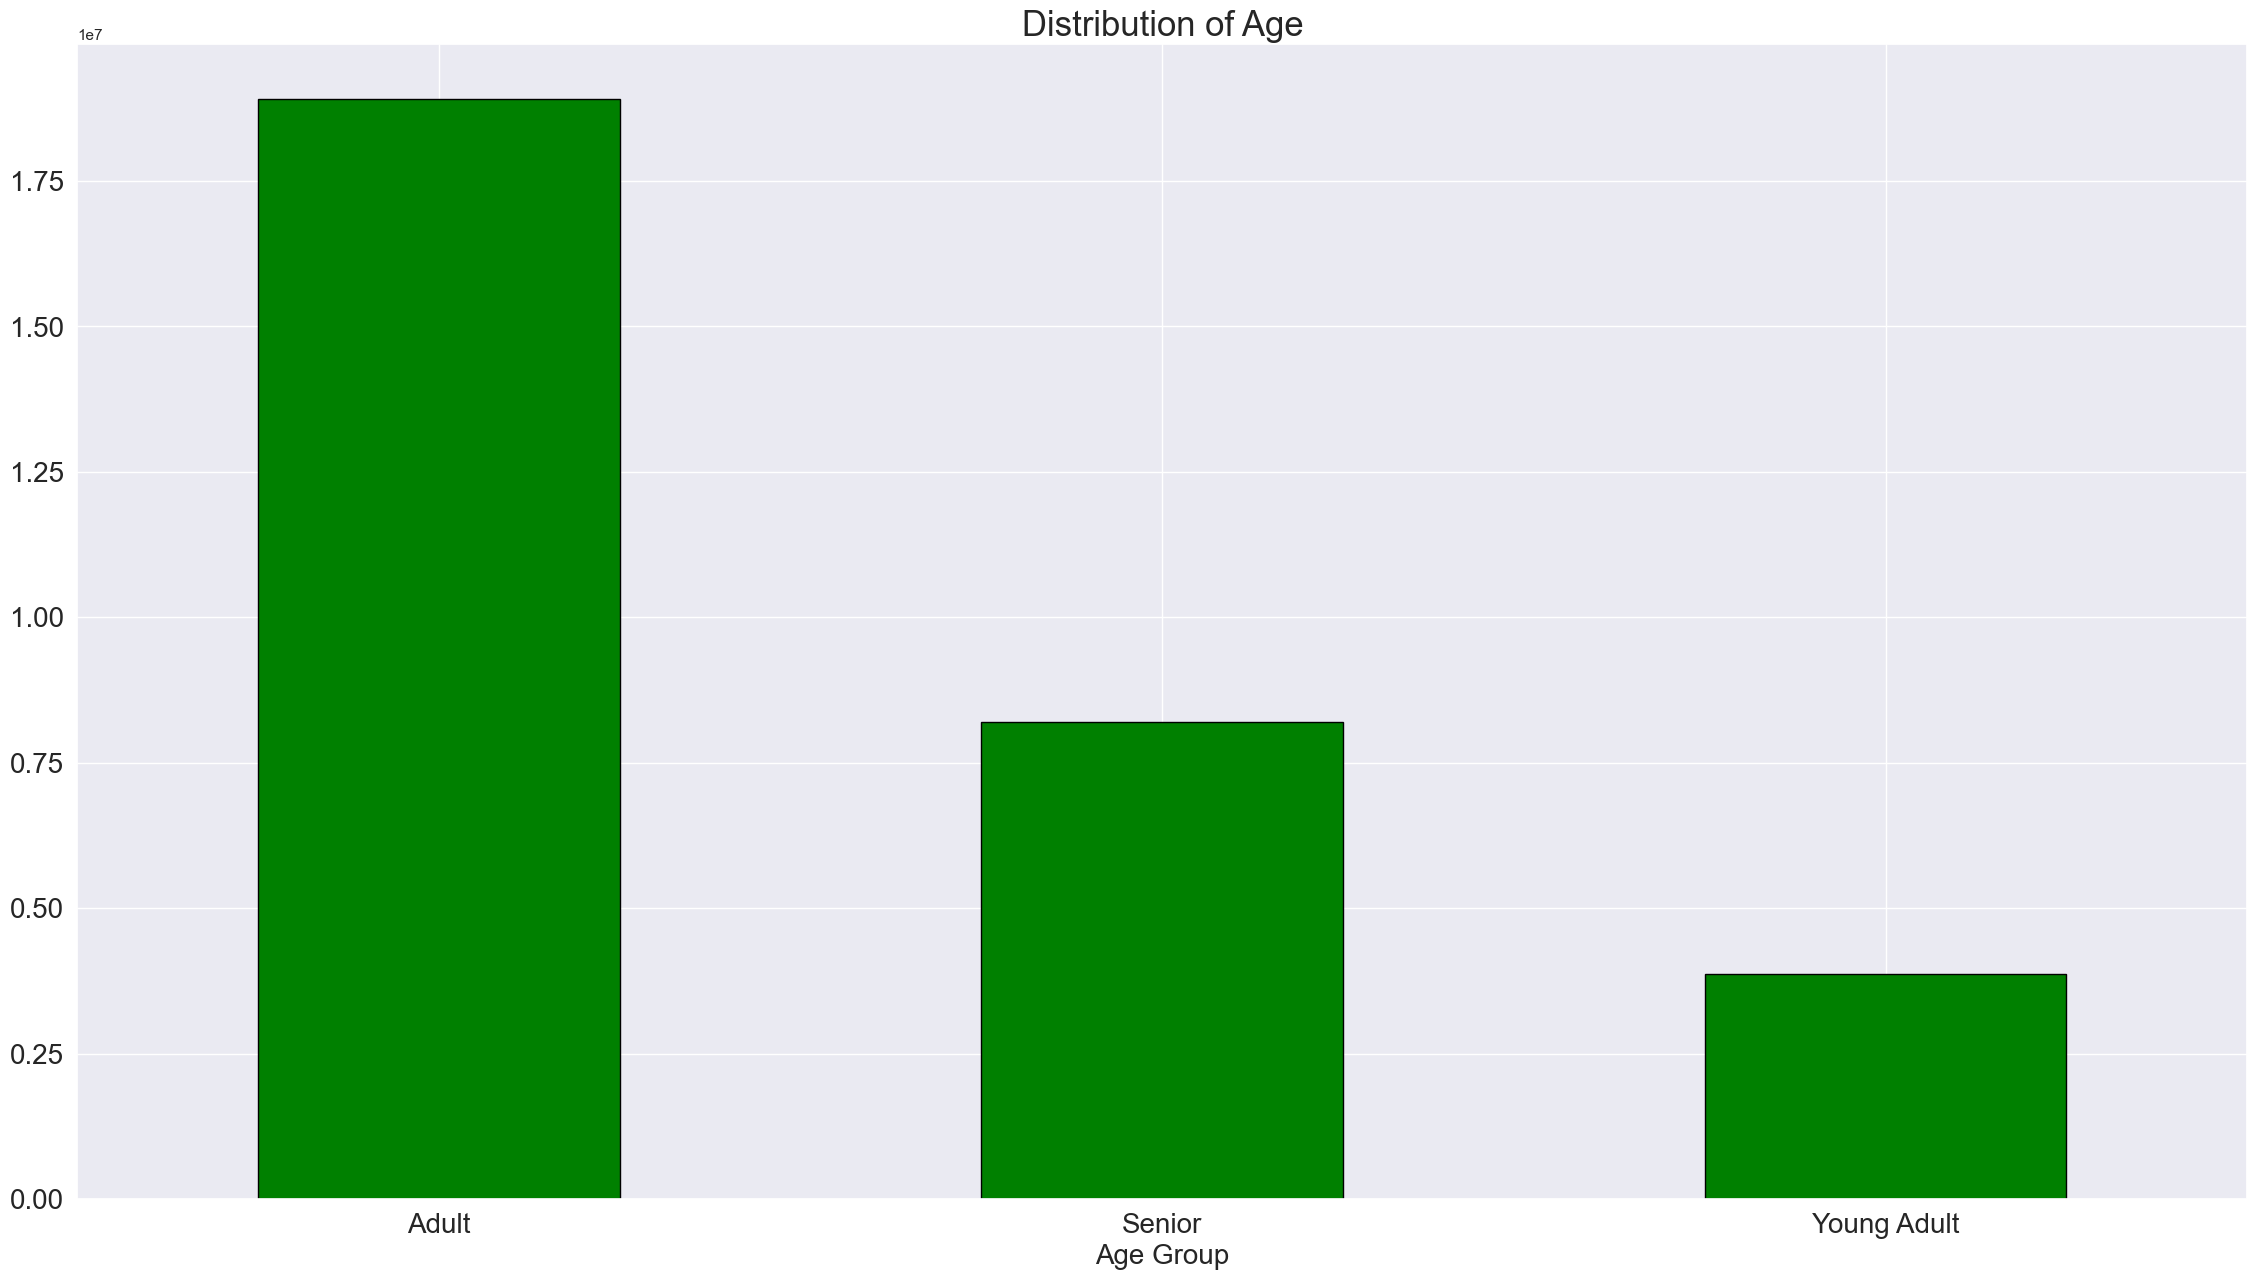

In [66]:
# Set script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
# Create bar chart for age distribution of customers
bar=df_active['age_group'].value_counts().plot.bar (color = 'green', edgecolor ='black', fontsize = 20)
#bar=df_unique['age_group'].value_counts().plot.bar (color = ['green','blue','purple'], fontsize = 20)
plt.title('Distribution of Age', fontsize = 25)
plt.xlabel('Age Group', fontsize = 20)
#plt.ylabel('Number of Customers', fontsize = 20)

bar.set_xticklabels(bar.get_xticklabels(), rotation=0)

In [67]:
# Export Age distribution bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'bar_age_distribution.png'))

### Income Profile Visualization

Text(0.5, 1.0, 'Distribution of Income')

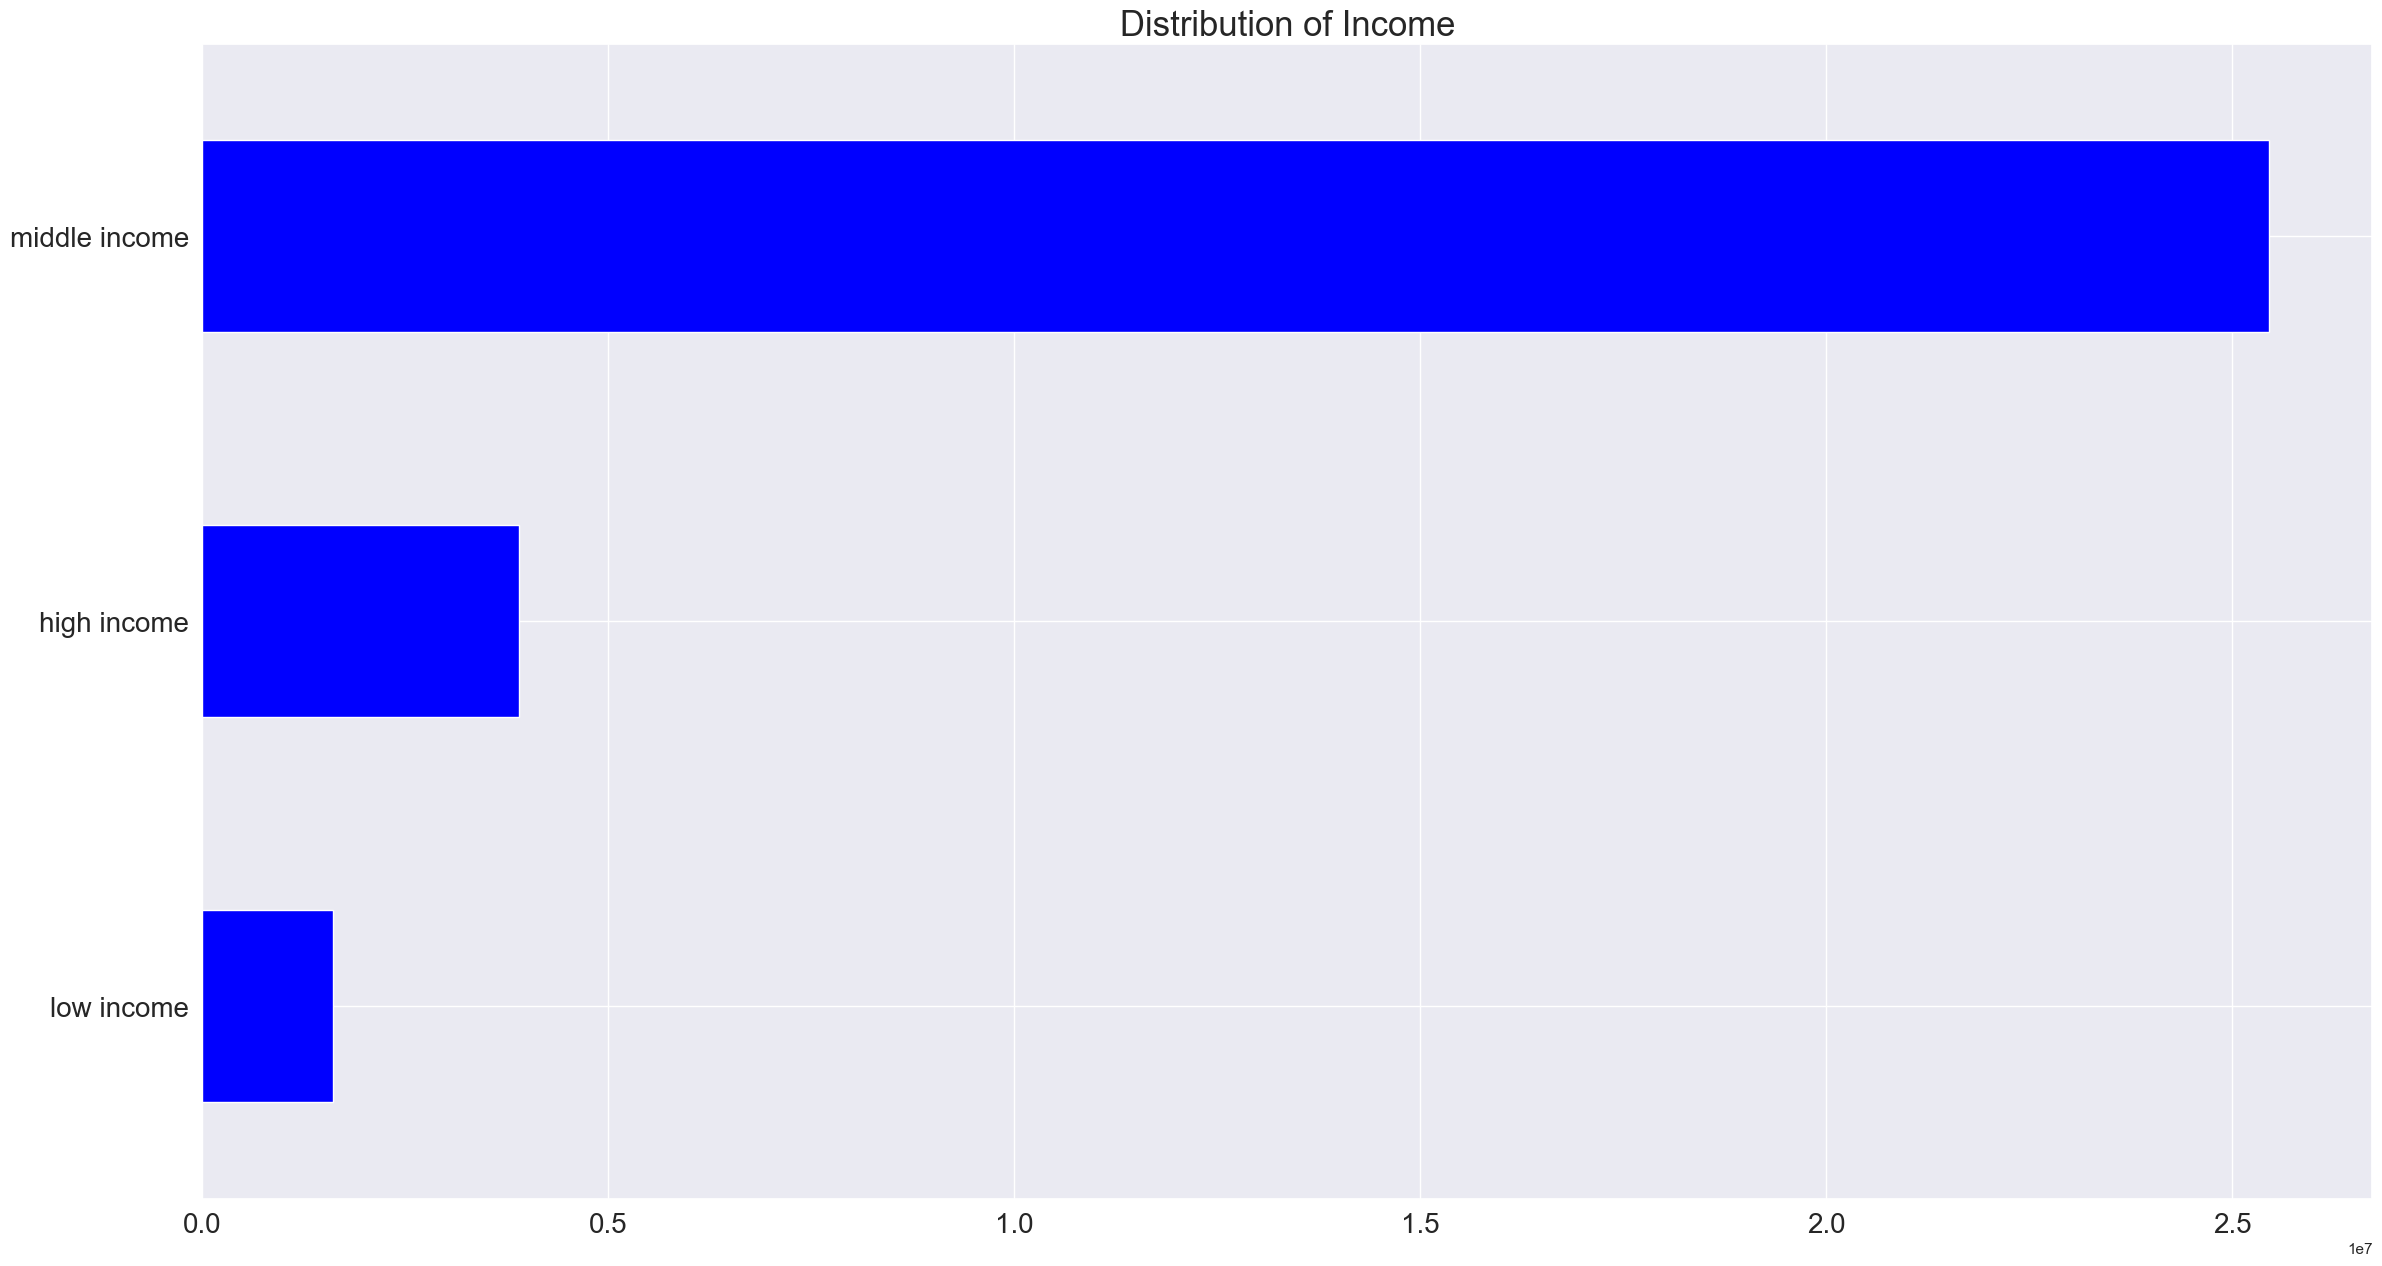

In [68]:
# Income profile visualization horizontal
income_bar = df_active['income_group'].value_counts().sort_values().plot.barh(color='blue',fontsize = 20) 
#income_bar = df_unique['income_group'].value_counts().sort_values().plot.barh(color='blue',fontsize = 20) 
plt.title('Distribution of Income', fontsize=25)                                                                            


In [69]:
# Export Income distribution bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'horizontal_bar_income_distribution.png'))

### Family Status and Dependants Profile Visualizations

In [70]:
# Create crosstab for dependants and family status 
family_status = pd.crosstab(df_active['marital_status'], df_active['dependant_group'])
#family_status = pd.crosstab(df_unique['marital_status'], df_unique['dependant_group'])


In [71]:
# Check crosstab
family_status

dependant_group,has dependants,no dependants
marital_status,,
divorced/widowed,0,2645271
living with parents and siblings,1481172,0
married,21743711,0
single,0,5094410


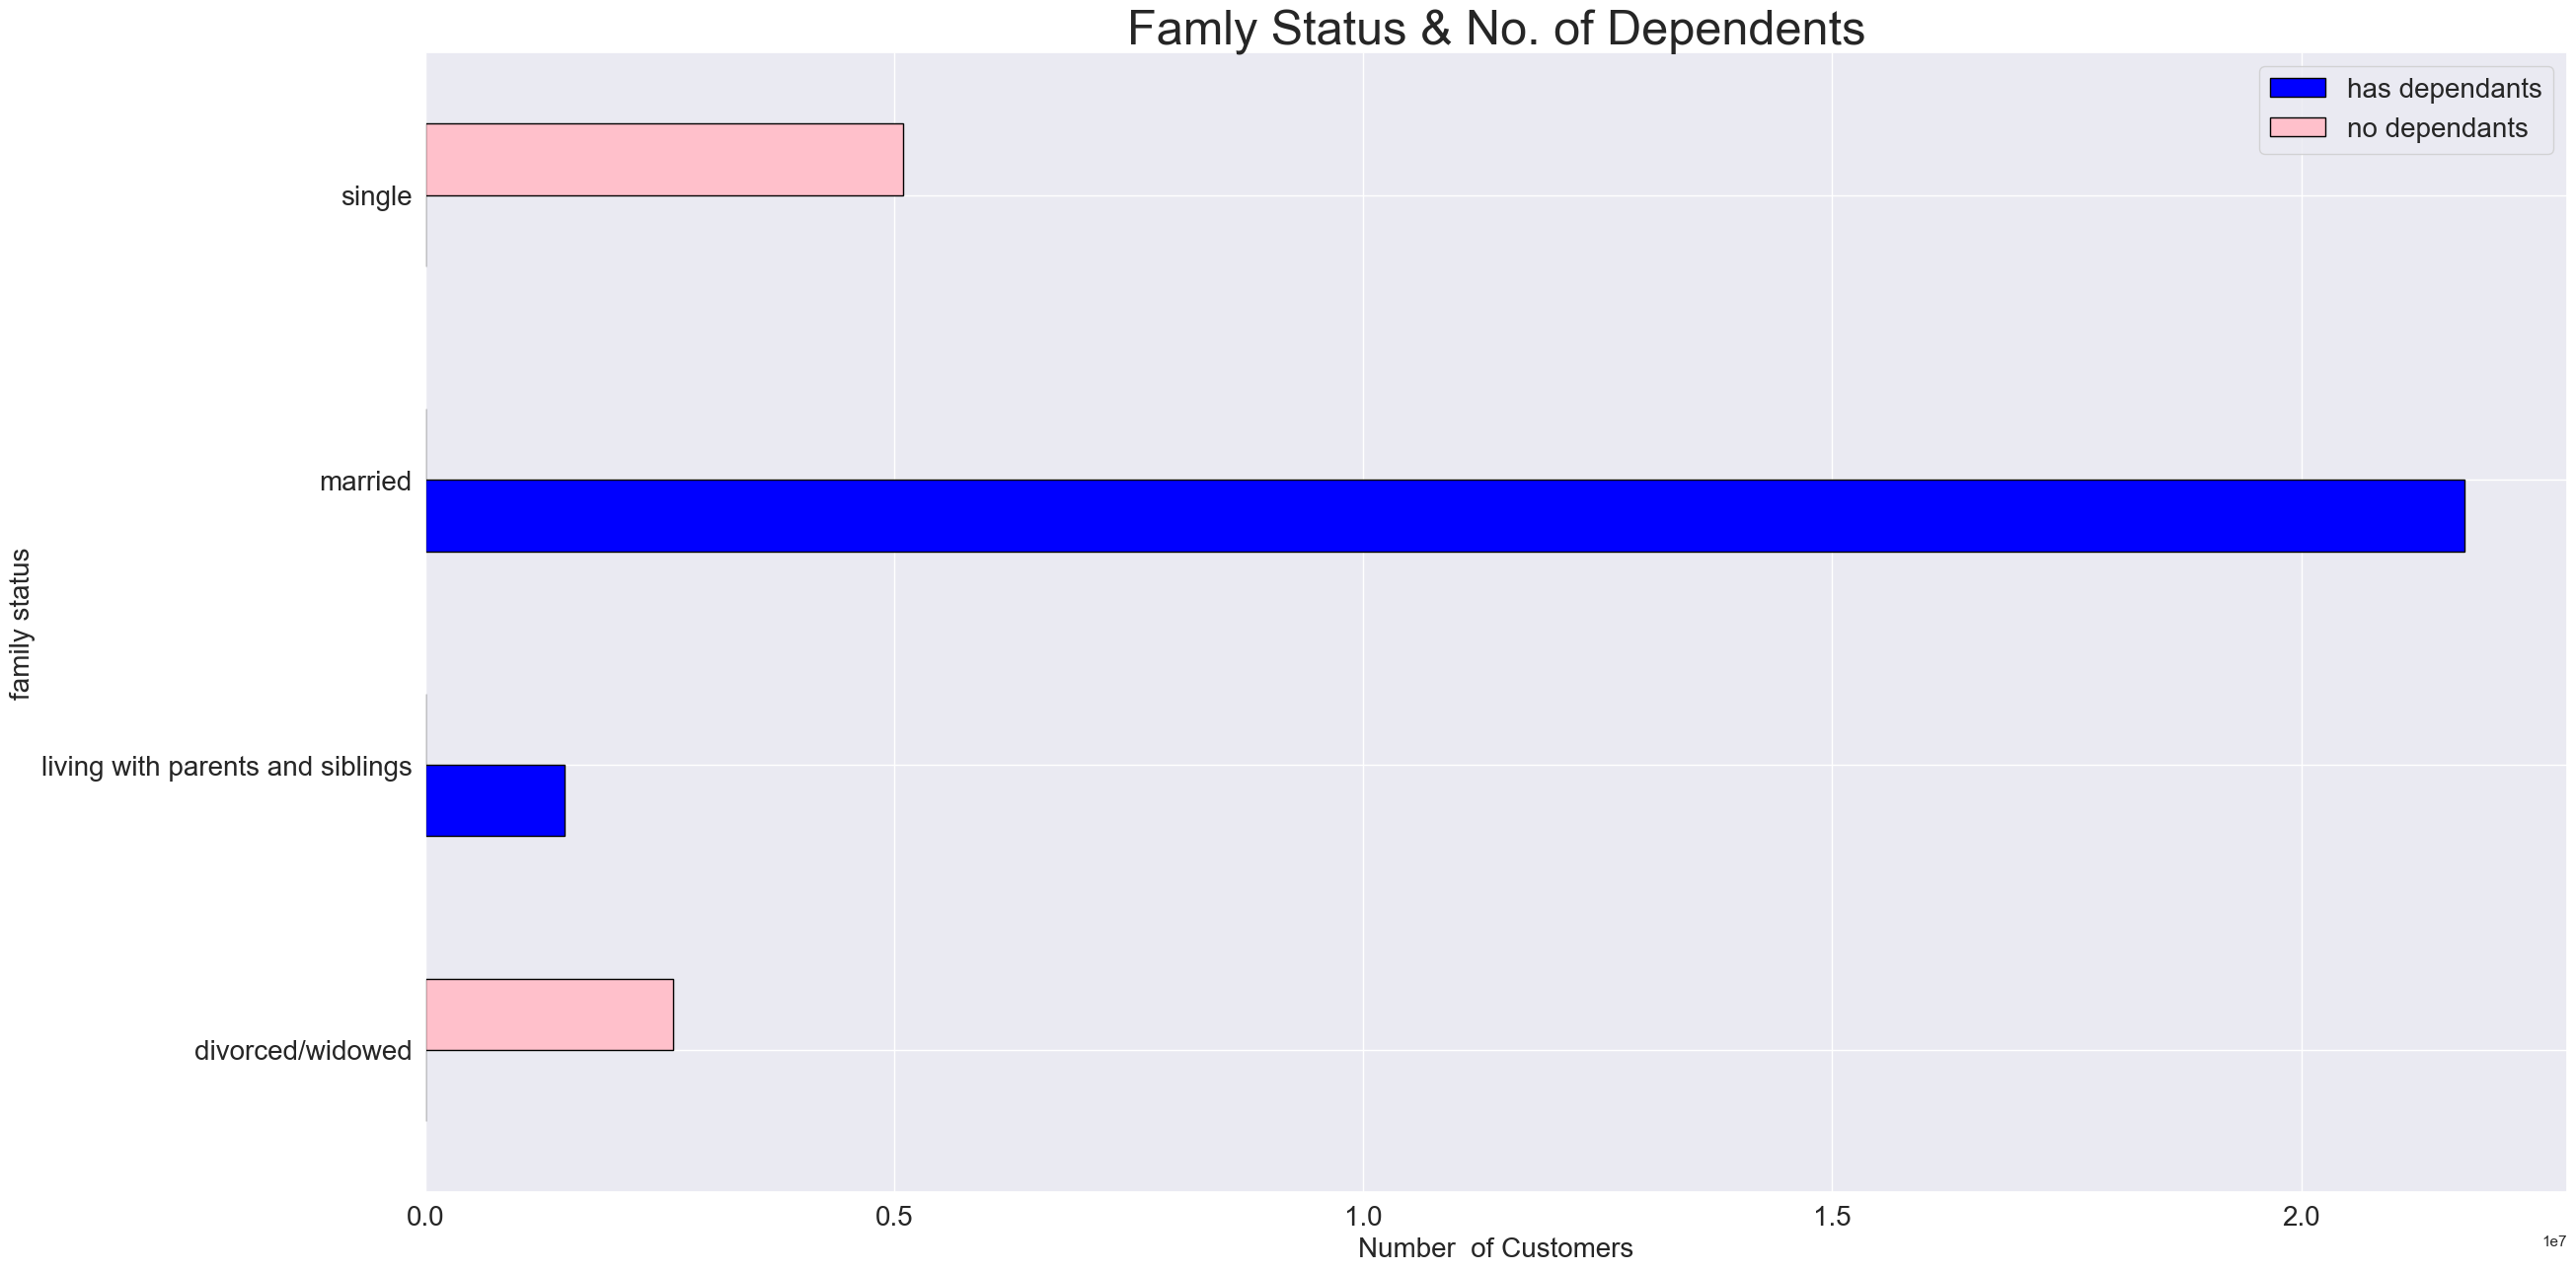

In [72]:
#Creating a horizontal bar chart
family_status_bar = family_status.plot.barh(color=['blue','pink'], edgecolor='black',fontsize=20)
plt.title('Famly Status & No. of Dependents', fontsize=35)
plt.xlabel('Number  of Customers', fontsize=20)
plt.ylabel('family status', fontsize=20)
plt.legend(fontsize=20)

In [73]:
family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'horizontal_bar_family_status_distribution.png'))


### Baby Department Visualization

In [74]:
#Checking Frequency: 0 = has not purchased baby supplies / 1 = has purchased baby supplies
df_active['baby_status'].value_counts()
#df_unique['baby_status'].value_counts()

0    21154311
1     9810253
Name: baby_status, dtype: int64

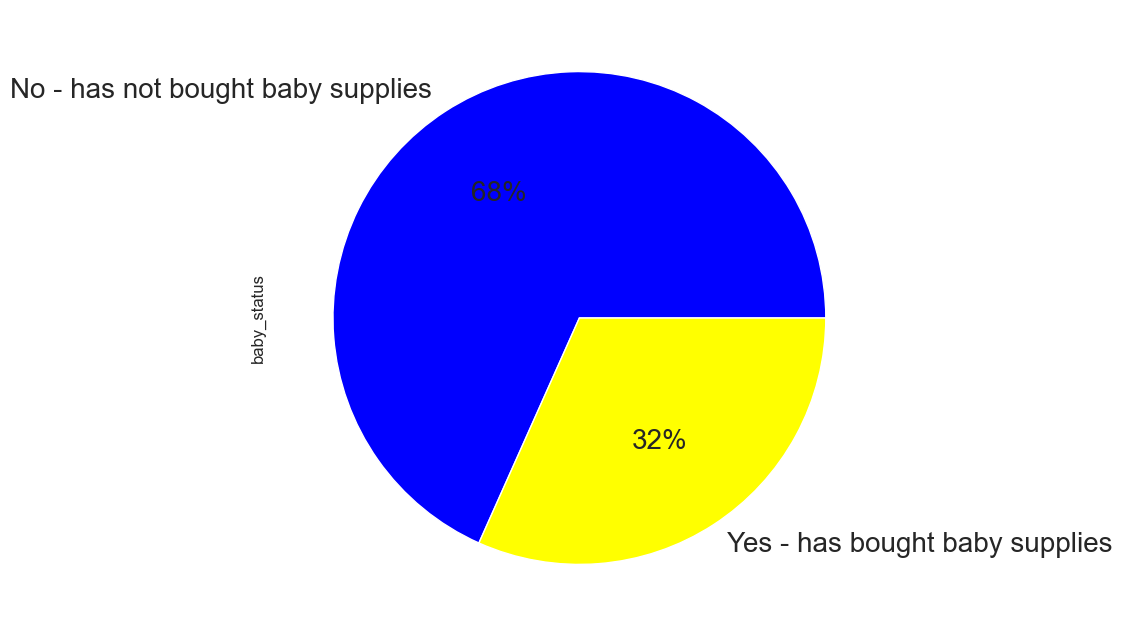

In [75]:
# Baby Status Visualization pie 
sns.set(rc = {'figure.figsize':(18,8)})

pie_baby = df_active['baby_status'].value_counts().plot.pie(labels=['No - has not bought baby supplies', 'Yes - has bought baby supplies'], autopct=('%1.f%%'), colors=['blue','yellow'], textprops= {'fontsize': 20})                                                                                                                      
#pie_baby = df_unique['baby_status'].value_counts().plot.pie(labels=['No - has not bought baby supplies', 'Yes - has bought baby supplies'], autopct=('%1.f%%'), colors=['blue','yellow'], textprops= {'fontsize': 20})                                                                                                                      


In [76]:
# Export Baby Visualization
pie_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'pie_baby_status.png'))

### Pet Department Profile Visualization





In [77]:
# Check Frequency: 0= has not bought pet supplies / 1= has bought pet supplies
df_active['pet_status'].value_counts()


0    27513213
1     3451351
Name: pet_status, dtype: int64

Text(0.5, 1.0, 'Pet Status')

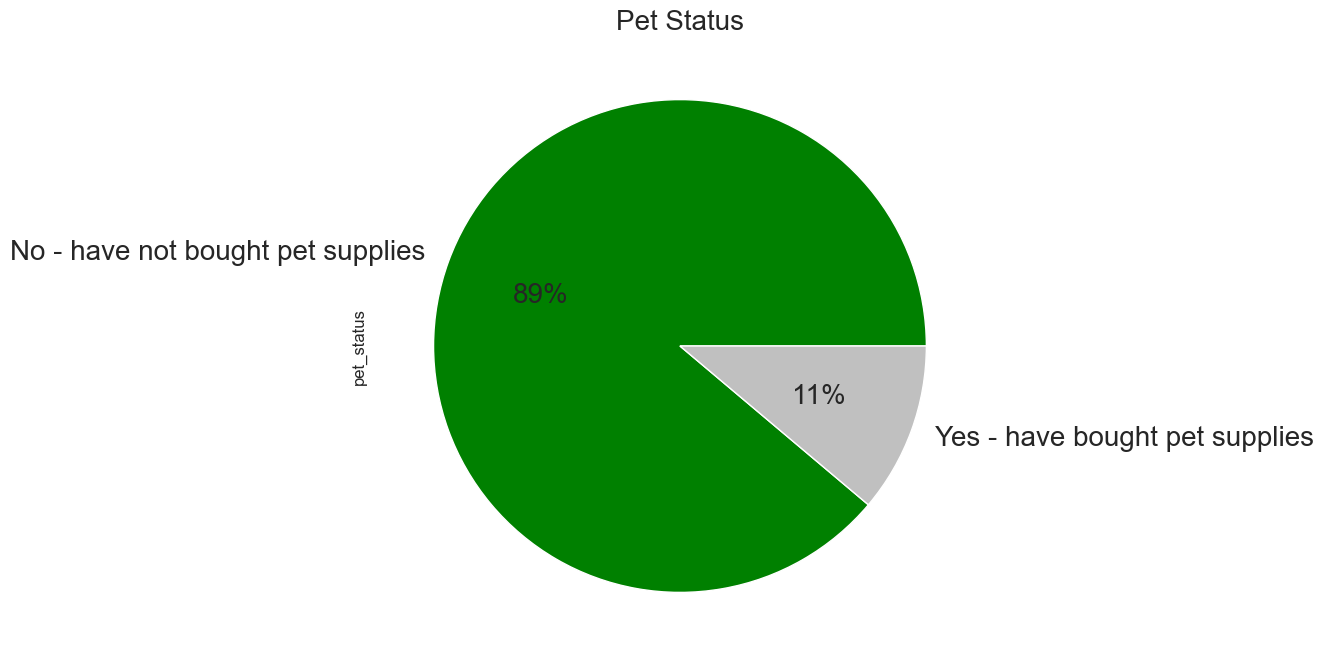

In [78]:
# Pet Status Visualization
sns.set(rc = {'figure.figsize':(18,8)})
pie_pet = df_active['pet_status'].value_counts().plot.pie(labels=['No - have not bought pet supplies', 'Yes - have bought pet supplies'], autopct=('%1.f%%'), colors=['Green','silver'], textprops= {'fontsize': 20})                                                                                                                      
 
plt.title('Pet Status', fontsize=20) 

In [79]:
# Export pet pie visualization 
pie_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'pie_pet_status.png'))

### Alcohol Department Visualization 

In [80]:
# Check Frequency: 0= has not bought alchohol / 1= has bought alcohol
df_active['alcohol_status'].value_counts()
#df_unique['alcohol_status'].value_counts()

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

Text(0.5, 1.0, 'Alcohol Status')

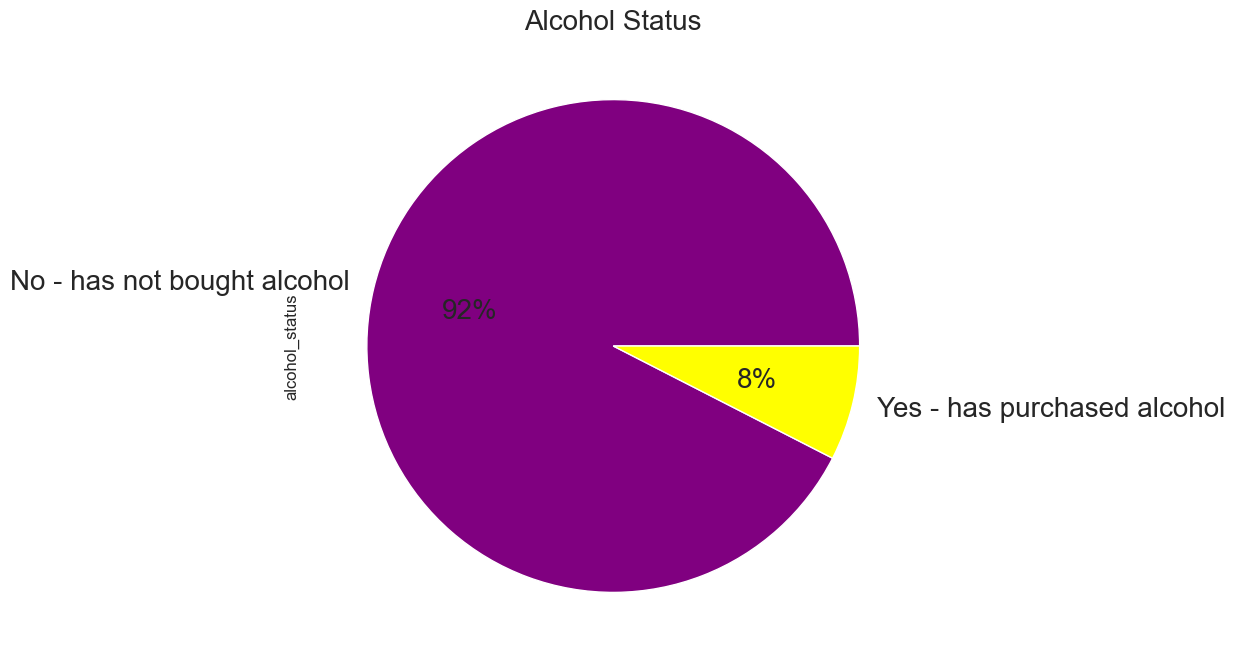

In [81]:
# Alcohol status visualization
sns.set(rc = {'figure.figsize':(18,8)})
pie_alcohol = df_active['alcohol_status'].value_counts().plot.pie(labels=['No - has not bought alcohol', 'Yes - has purchased alcohol'], autopct=('%1.f%%'), colors=['purple','yellow'], textprops = {'fontsize':20})

plt.title('Alcohol Status', fontsize=20)

In [82]:
# Export alcohol pie visualization 
pie_alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'pie_alcohol_status.png'))

### Customer Profile Comparison Visualizations

#### Q8. Compare your customer profiles with regions and departments




#### Region and Age profile

In [83]:
# Creating crosstab for region and age group

age_region = pd.crosstab(index=df_active['region'], columns= df_active['age_group'],normalize = "index")

In [84]:
#creating cross tab to display labels

age_region_labels=pd.crosstab(index=df_active['region'],columns=df_active['age_group']) 

In [85]:
# check crosstab
age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,0.614102,0.262211,0.123687
Northeast,0.603872,0.271710,0.124419
South,0.609796,0.262673,0.127531
West,0.612766,0.264687,0.122548


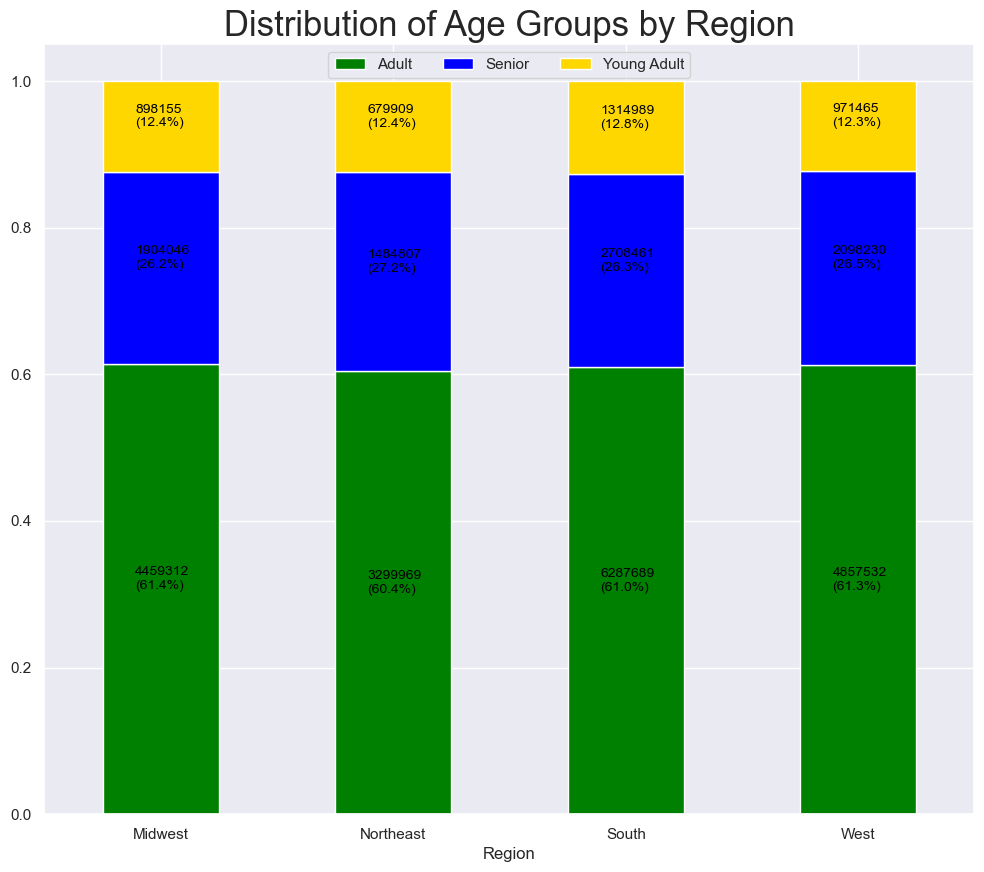

In [86]:
#Creating stacked bar chart for region and age
age_region_dist=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['green','blue','gold'], 
                        figsize=(12,10))

plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 #s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)
        
age_region_dist.set_xticklabels(age_region_dist.get_xticklabels(), rotation=0)
plt.show()

In [87]:
# Export distribution age region stacked bar 
age_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'stacked_bar_age_distribution.png'))

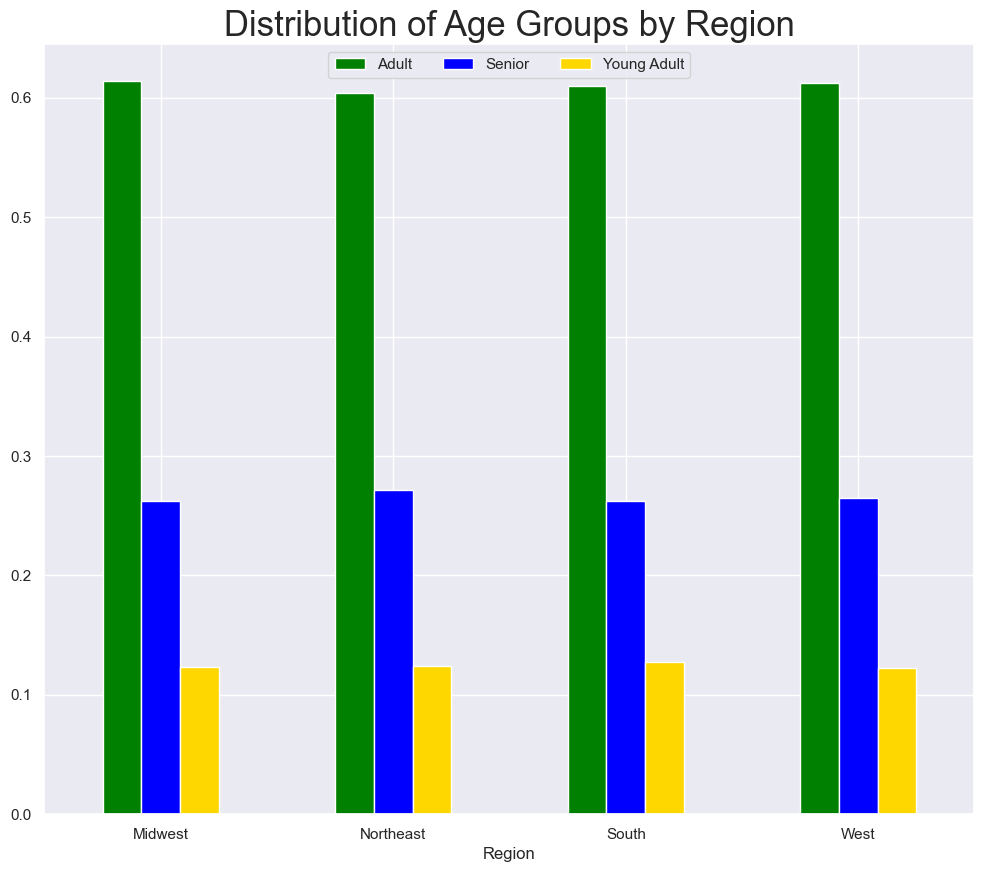

In [88]:
# Creating bar chart for region and age
age_region_dist=age_region.plot(kind='bar', 
                        stacked=False, 
                        color=['green','blue','gold'],
                        figsize=(12,10))
plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")
age_region_dist.set_xticklabels(age_region_dist.get_xticklabels(), rotation=0)
plt.show()

In [89]:
# Export distribution age region bar 
age_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'bar_age_distribution.png'))

#### Region and Income 

In [90]:
# Creating crosstab for region and income 
income_region = pd.crosstab(index=df_active['region'], columns= df_active['income_group'],normalize = "index")

In [91]:
# Creating cross tab to display labels                                                               
income_region_labels=pd.crosstab(index=df_active['region'],columns=df_active['income_group'])

In [92]:
# Check crosstab 
income_region

income_group,high income,low income,middle income
region,,,
Midwest,0.126286,0.051451,0.822263
Northeast,0.124012,0.051810,0.824178
South,0.125139,0.053545,0.821316
West,0.127357,0.050864,0.821778


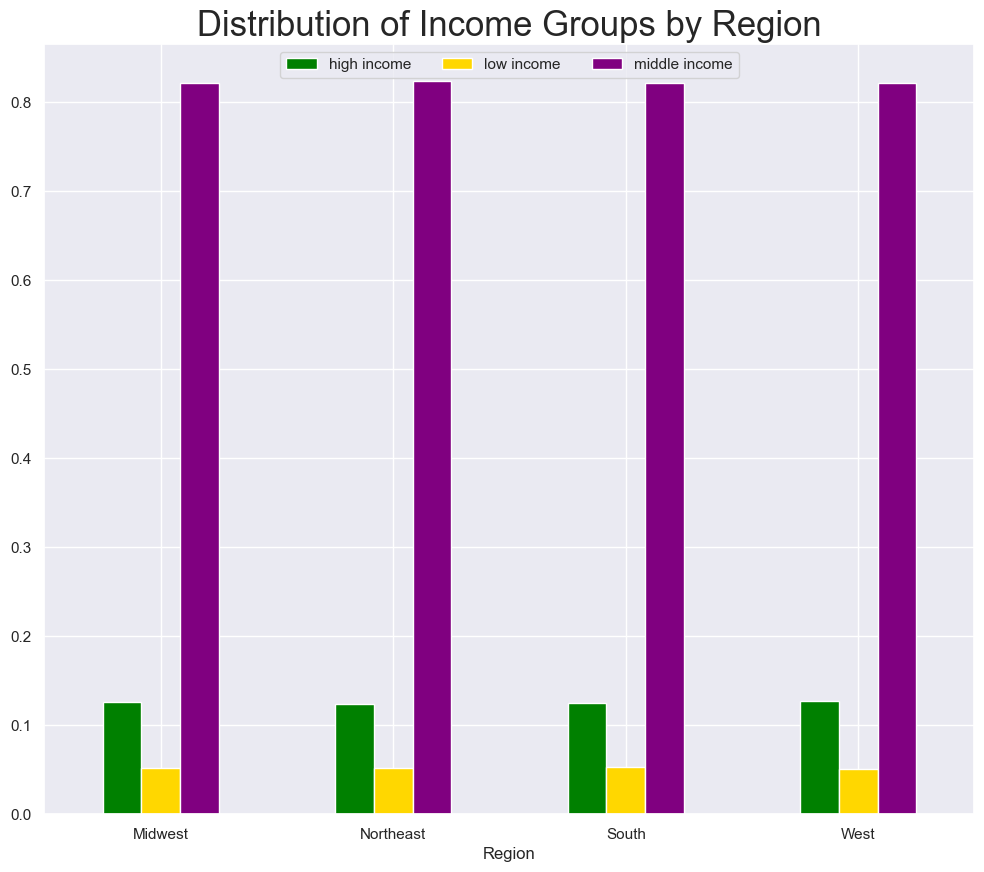

In [93]:
#creating bar chart for income by region
income_region_dist= income_region.plot(kind='bar', 
                        stacked=False, 
                        color=['green','gold','purple'],
                        figsize=(12,10))
plt.title('Distribution of Income Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")
income_region_dist.set_xticklabels(income_region_dist.get_xticklabels(), rotation=0)
plt.show()

In [94]:
# Export bar chart Distribution of Income Groups by Region

income_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'bar_income_distribution.png'))

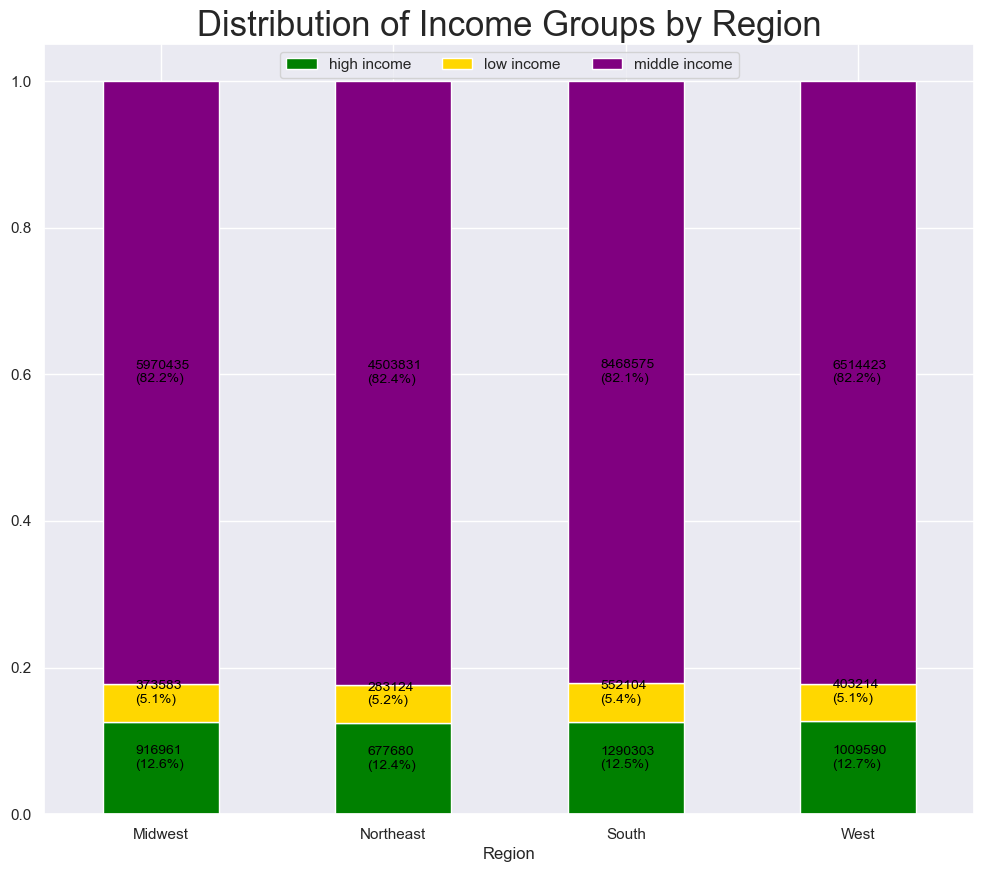

In [95]:
# Creating stacked bar chart for income region groups distribution
income_region_dist_stacked=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['green','gold','purple'], 
                        figsize=(12,10))

plt.title('Distribution of Income Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 #s=f'{count}', 
                 color="black",
                 fontsize=10)
        
income_region_dist_stacked.set_xticklabels(income_region_dist_stacked.get_xticklabels(), rotation=0)
plt.show()

In [96]:
# Export stacked bar Distribution of Income 
income_region_dist_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'dist_income_region_stacked.png'))

#### Region and Department 

In [97]:
# Creating crosstab for region and department

dept_region = pd.crosstab(index=df_active['department'], columns= df_active['region'],normalize = "index")

In [98]:
#creating cross tab to display labels

dept_region_labels=pd.crosstab(index=df_active['department'],columns=df_active['region'])   

In [99]:
# Check crosstab
dept_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,0.235385,0.172976,0.337510,0.254130
babies,0.233292,0.177177,0.339946,0.249586
bakery,0.233535,0.177815,0.331558,0.257091
beverages,0.232893,0.179995,0.334157,0.252955
breakfast,0.232772,0.175753,0.332670,0.258805
bulk,0.237033,0.167379,0.334220,0.261367
canned goods,0.234626,0.174825,0.333432,0.257117
dairy eggs,0.234199,0.176663,0.332810,0.256329
deli,0.233568,0.177717,0.332346,0.256369


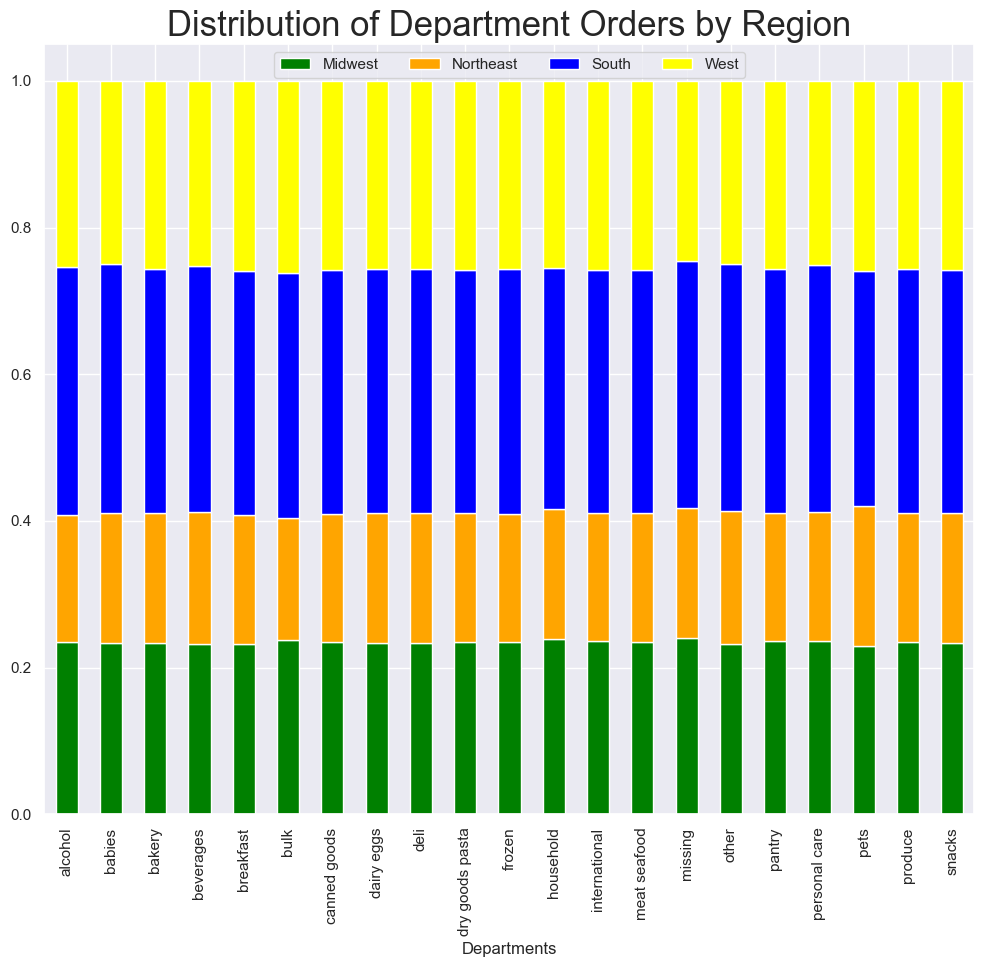

In [100]:
# stacked bar chart dept_region distribution
dept_region_stacked=dept_region.plot(kind='bar', 
                        stacked=True, 
                        color=['green','orange','blue','yellow'], 
                        figsize=(12,10))

plt.title('Distribution of Department Orders by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Departments")


plt.show()

In [101]:
# Export stacked bar department region 
dept_region_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'dept_region_stacked.png'))

#### Region and Customer Loyalty

In [102]:
# Creating crosstab for region and customer loyalty

loyalty_region = pd.crosstab(index=df_active['region'], columns= df_active['loyalty_flag'],normalize = "index")

In [103]:
# Creating cross tab to display labels
                                                                  
loyalty_region_labels=pd.crosstab(index=df_active['region'],columns=df_active['loyalty_flag'])       

In [104]:
# Check crosstab
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.326898,0.156546,0.516556
Northeast,0.337034,0.154109,0.508857
South,0.330307,0.154558,0.515135
West,0.335892,0.155302,0.508806


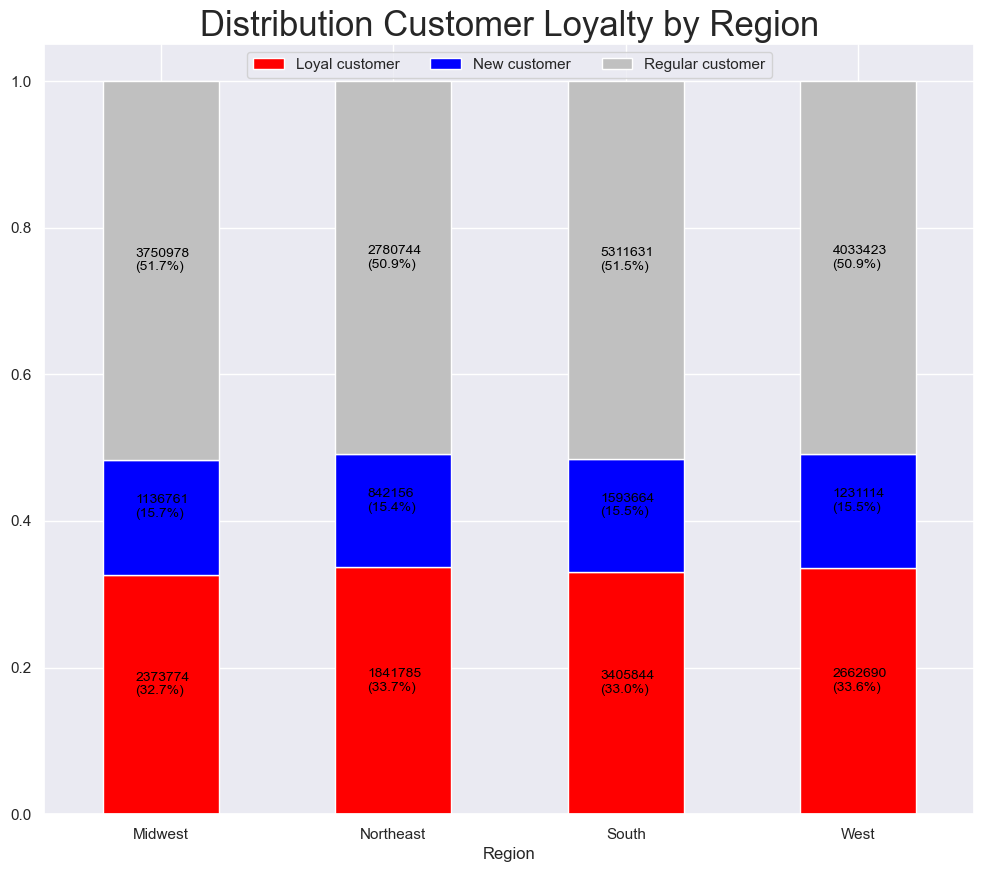

In [105]:
#Creating stacked bar chart for loyalty_region distribution
loyalty_region_dist_stacked=loyalty_region.plot(kind='bar', 
                        stacked=True, 
                        color=['red','blue','silver'], 
                        figsize=(12,10))

plt.title('Distribution Customer Loyalty by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*loyalty_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                         loyalty_region_labels.loc[y],
                                          loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 # s=f'{count}', 
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)
loyalty_region_dist_stacked.set_xticklabels(income_region_dist_stacked.get_xticklabels(), rotation=0)
plt.show()


In [106]:
# Export stacked bar Customer loyalty by Region 
loyalty_region_dist_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'bar_loyalty_region_stacked.png'))

#### Region and Price Range

In [107]:
# Creating crosstab for region and customer loyalty

price_range_region = pd.crosstab(index=df_active['region'], columns= df_active['price_range_loc'],normalize = "index")

In [108]:
# Creating cross tab to display labels
price_range_region_labels=pd.crosstab(index=df_active['region'],columns=df_active['price_range_loc'])        


In [109]:
# Check crosstab
price_range_region

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,0.012846,0.312206,0.674949
Northeast,0.012760,0.313350,0.673889
South,0.012866,0.312041,0.675093
West,0.012902,0.312580,0.674517


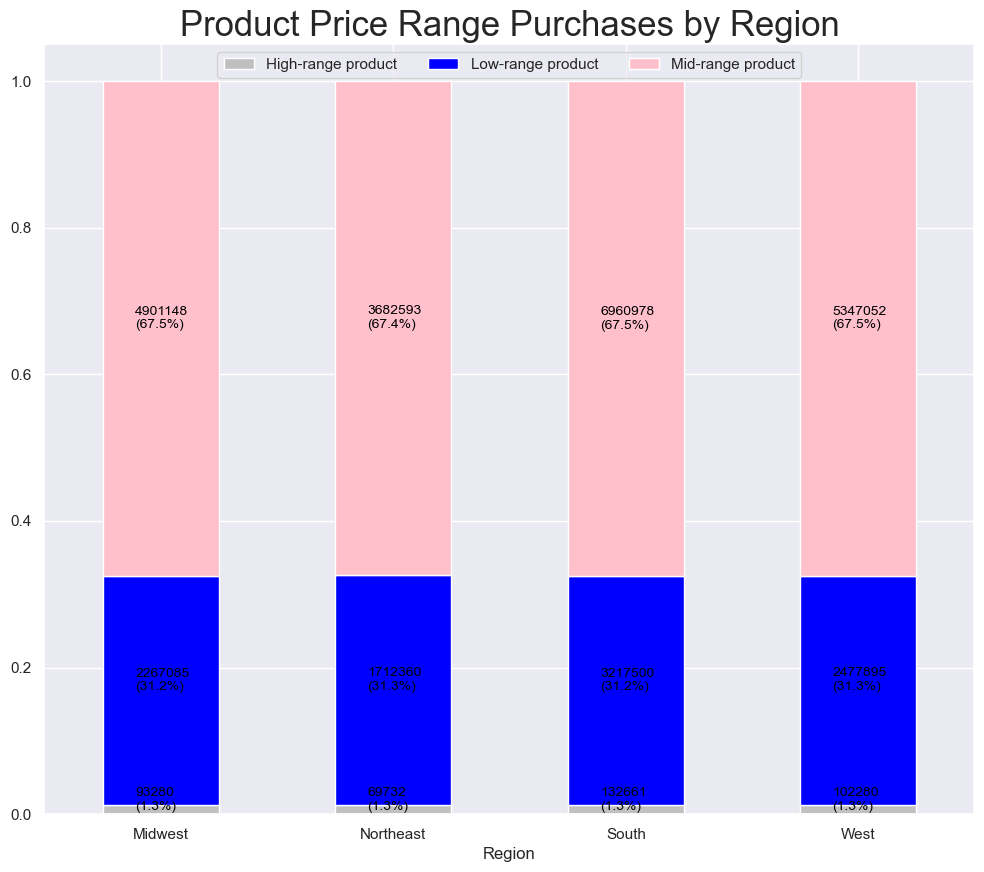

In [110]:
#Creating stacked bar chart for price_range_region distribution
price_range_region_stacked=price_range_region.plot(kind='bar', 
                        stacked=True, 
                        color=['silver','blue','pink'], 
                        figsize=(12,10))

plt.title('Product Price Range Purchases by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*price_range_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_region.loc[y],
                                         price_range_region_labels.loc[y],
                                          price_range_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 #s=f'{count}', 
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

price_range_region_stacked.set_xticklabels(income_region_dist_stacked.get_xticklabels(), rotation=0)
plt.show()


In [111]:
# Export stacked bar product price range 
price_range_region_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'product_price_range_region_stacked.png'))

### Order Frequency Distributions

#### Age group and order frequency

In [112]:
# Creating crosstab for age group and order frequency 
age_frequency=pd.crosstab(index=df_active['age_group'], columns= df_active['Frequency_flag'], normalize = "index")

In [113]:
# Creating cross tab to display labels
age_frequency_labels=pd.crosstab(df_active['age_group'],columns=df_active['Frequency_flag']) 

In [114]:
#Check crosstab
age_frequency

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,0.683412,0.093967,0.222620
Senior,0.687078,0.092749,0.220173
Young Adult,0.686743,0.092751,0.220506


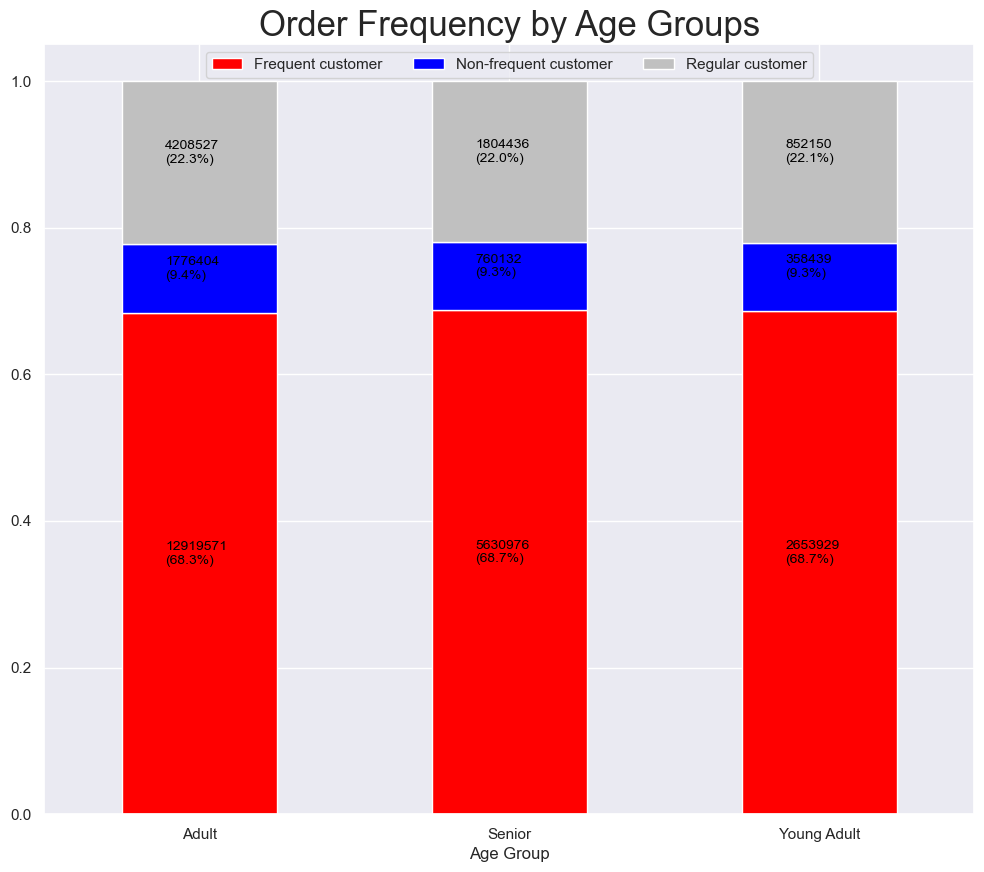

In [115]:
#Creating stacked bar chart for age group & order frequency
age_frequency_stacked=age_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['red','blue','silver'], 
                        figsize=(12,10))

plt.title('Order Frequency by Age Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Age Group")


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_frequency.loc[y],
                                         age_frequency_labels.loc[y],
                                          age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 #s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

age_frequency_stacked.set_xticklabels(age_frequency_stacked.get_xticklabels(), rotation=0)
plt.show()

In [116]:
# Export stacked bar 
age_frequency_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'age_frequency_stacked.png'))

#### Income group and order frequency

In [117]:
# Creating crosstab for income group and order frequency 
income_frequency = pd.crosstab(index=df_active['income_group'],columns=df_active['Frequency_flag'], normalize = "index")


In [118]:
# Creating cross tab to display labels
income_frequency_labels=pd.crosstab(index=df_active['income_group'],columns=df_active['Frequency_flag']) 

In [119]:
#Check crosstab
income_frequency

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
high income,0.693195,0.088648,0.218157
low income,0.644528,0.114452,0.241019
middle income,0.686063,0.092908,0.221029


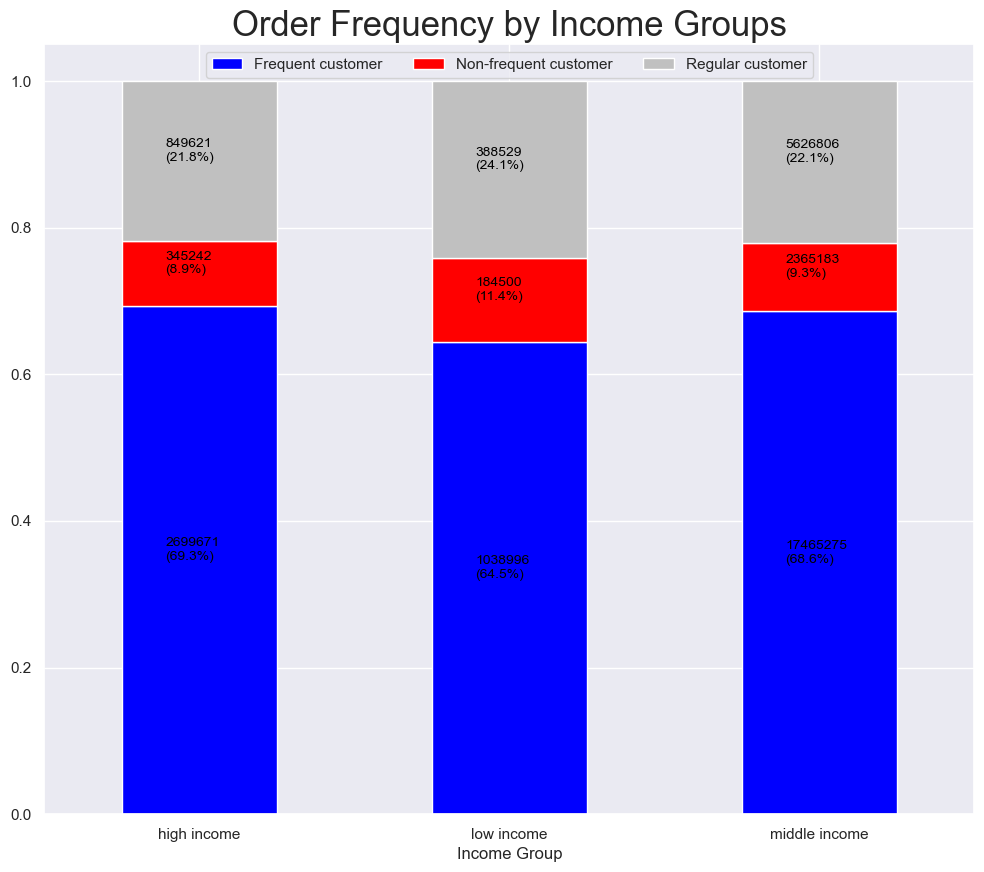

In [120]:
#Creating stacked bar chart for age & order frequency
income_frequency_stacked=income_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','red','silver'], 
                        figsize=(12,10))

plt.title('Order Frequency by Income Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Income Group")


for n, y in enumerate([*income_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_frequency.loc[y],
                                         income_frequency_labels.loc[y],
                                          income_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 # s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

income_frequency_stacked.set_xticklabels(income_frequency_stacked.get_xticklabels(), rotation=0)
plt.show()

In [121]:
# Export stacked bar Order frequency by Income group
income_frequency_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'income_frequency_stacked.png'))

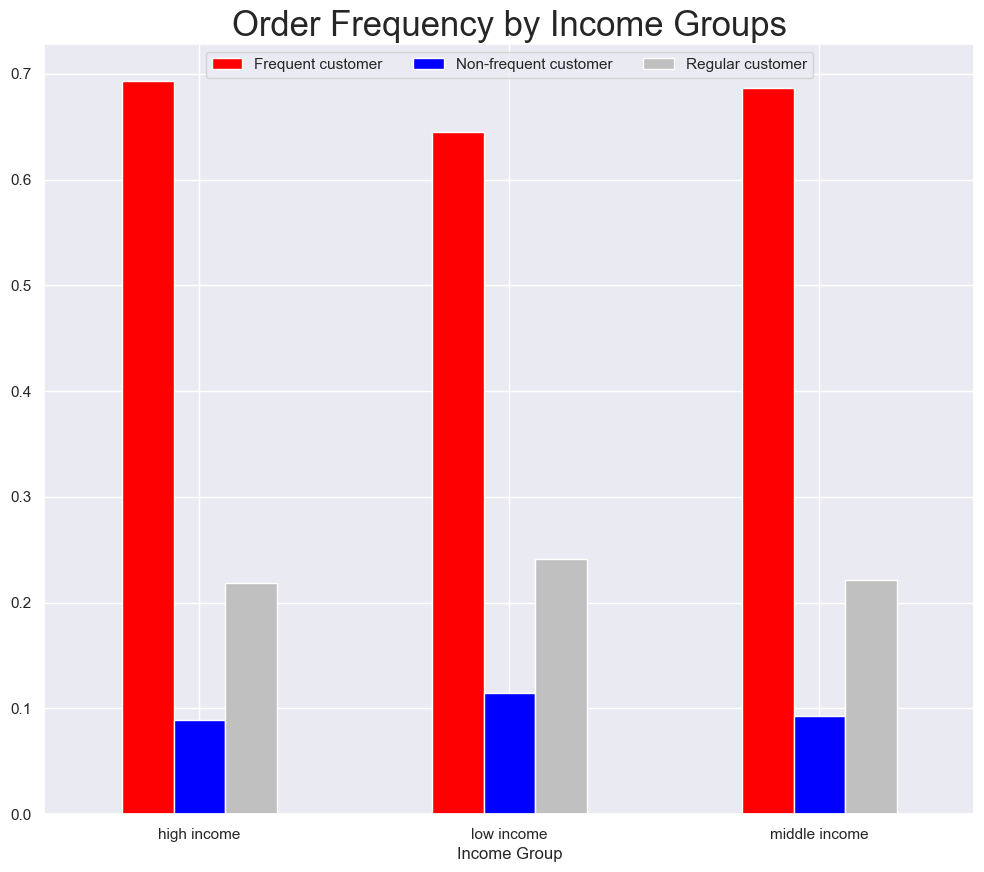

In [122]:
#creating bar chart for order frequency by Income group 
income_frequency_bar = income_frequency.plot(kind='bar', 
                        stacked=False, 
                        color=['red','blue','silver'],
                        figsize=(12,10))
plt.title('Order Frequency by Income Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Income Group")
income_frequency_bar.set_xticklabels(income_frequency_bar.get_xticklabels(), rotation=0)
plt.show()

In [123]:
# Export bar Order frequency by Income group
income_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'income_frequency_bar.png'))

#### Family/Marital Status and Order Frequency

In [124]:
# Creating crosstab for family Status and order frequency 
family_frequency = pd.crosstab(index=df_active['marital_status'],columns= df_active['Frequency_flag'], normalize = "index")

In [125]:
# Creating cross tab to display labels
family_frequency_labels=pd.crosstab(index=df_active['marital_status'],columns=df_active['Frequency_flag']) 

In [126]:
# Check crosstab
family_frequency

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,0.687689,0.092215,0.220096
living with parents and siblings,0.695742,0.093606,0.210652
married,0.684742,0.093812,0.221446
single,0.680356,0.092763,0.226881


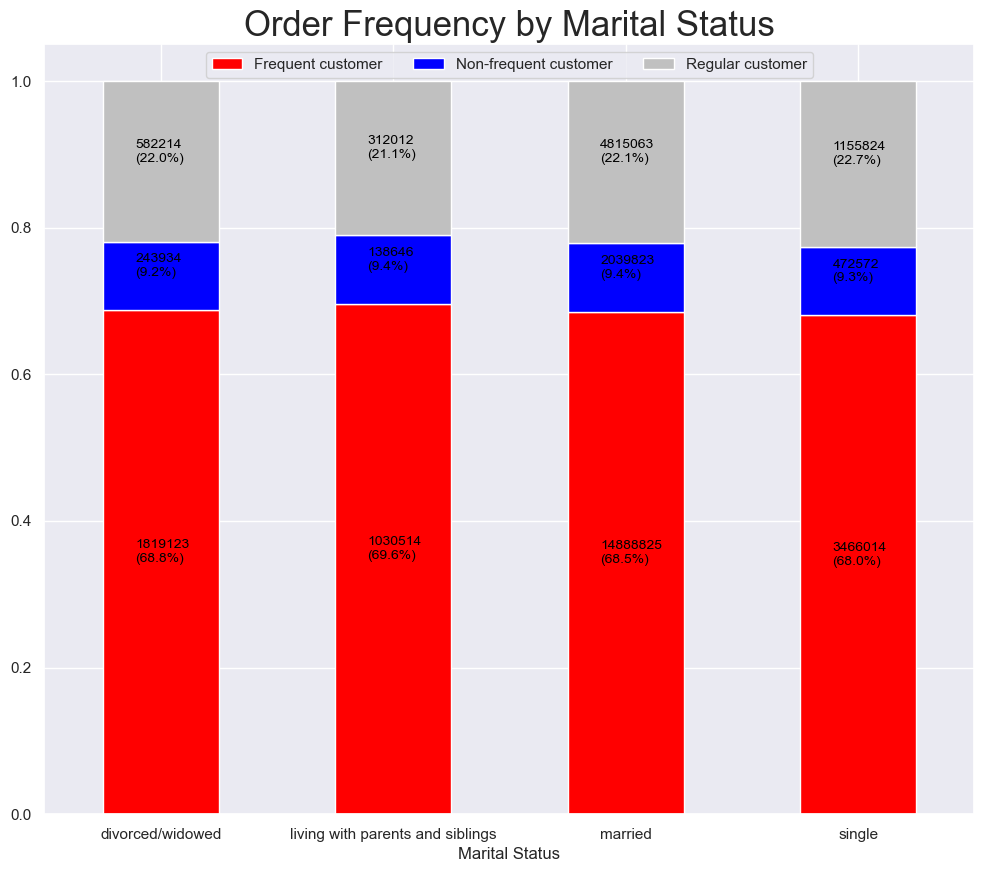

In [127]:
#Creating stacked bar chart for Family / Marital status and  frequency
family_frequency_stacked=family_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['red','blue','silver'], 
                        figsize=(12,10))

plt.title('Order Frequency by Marital Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Marital Status")


for n, y in enumerate([*family_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(family_frequency.loc[y],
                                         family_frequency_labels.loc[y],
                                          family_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 # s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

family_frequency_stacked.set_xticklabels(family_frequency_stacked.get_xticklabels(), rotation=0)
plt.show()

In [128]:
# Export stacked bar Family / Marital and frequency 
family_frequency_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'family_frequency_stacked.png'))

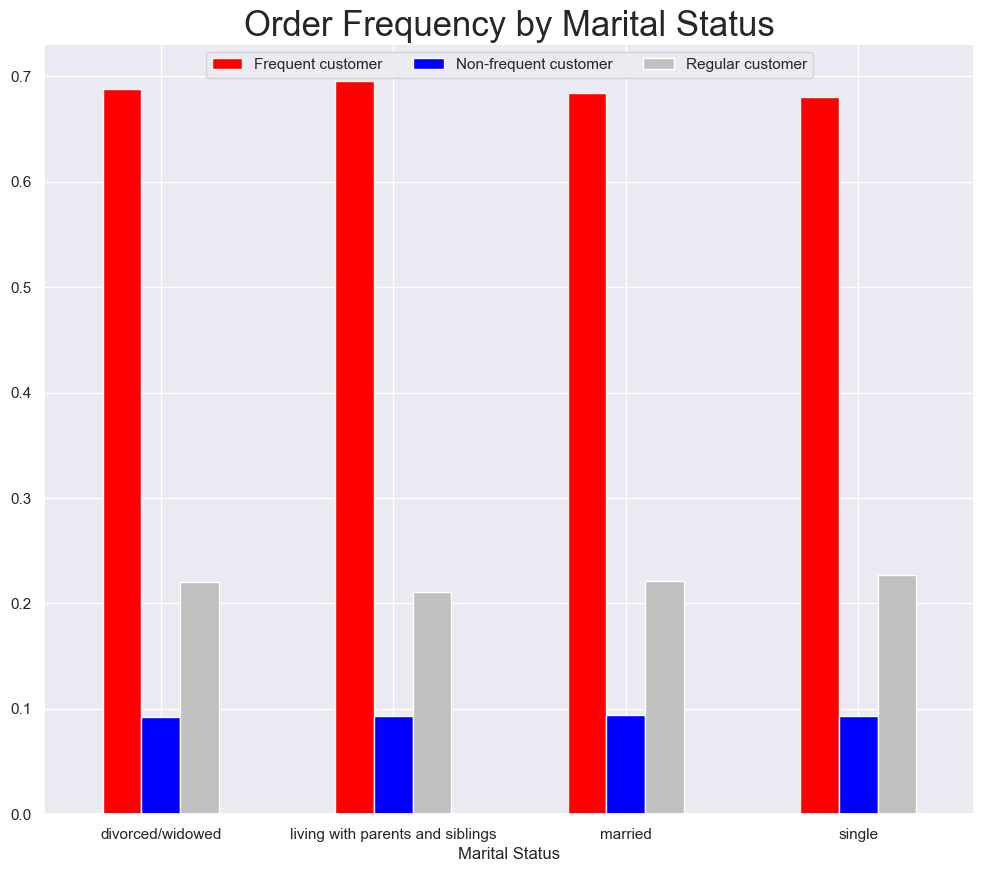

In [129]:
#creating bar chart for order frequency by marital status 
family_frequency_bar = family_frequency.plot(kind='bar', 
                        stacked=False, 
                        color=['red','blue','silver'],
                        figsize=(12,10))
plt.title('Order Frequency by Marital Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Marital Status")
family_frequency_bar.set_xticklabels(family_frequency_bar.get_xticklabels(), rotation=0)
plt.show()

In [130]:
# Export stacked bar Family / Marital and frequency 
family_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'family_frequency_bar.png'))

### Price Range Distributions

#### Age group and prices 

In [131]:
# Creating crosstab for age group and prices 
age_prices = pd.crosstab(index=df_active['age_group'],columns= df_active['price_range_loc'],normalize = "index")

In [132]:
# Creating cross tab to display labels
age_prices_labels=pd.crosstab(index=df_active['age_group'],columns=df_active['price_range_loc']) 

In [133]:
# Check crosstab
age_prices

price_range_loc,High-range product,Low-range product,Mid-range product
age_group,,,
Adult,0.012764,0.312474,0.674762
Senior,0.013046,0.312255,0.674700
Young Adult,0.012872,0.312737,0.674391


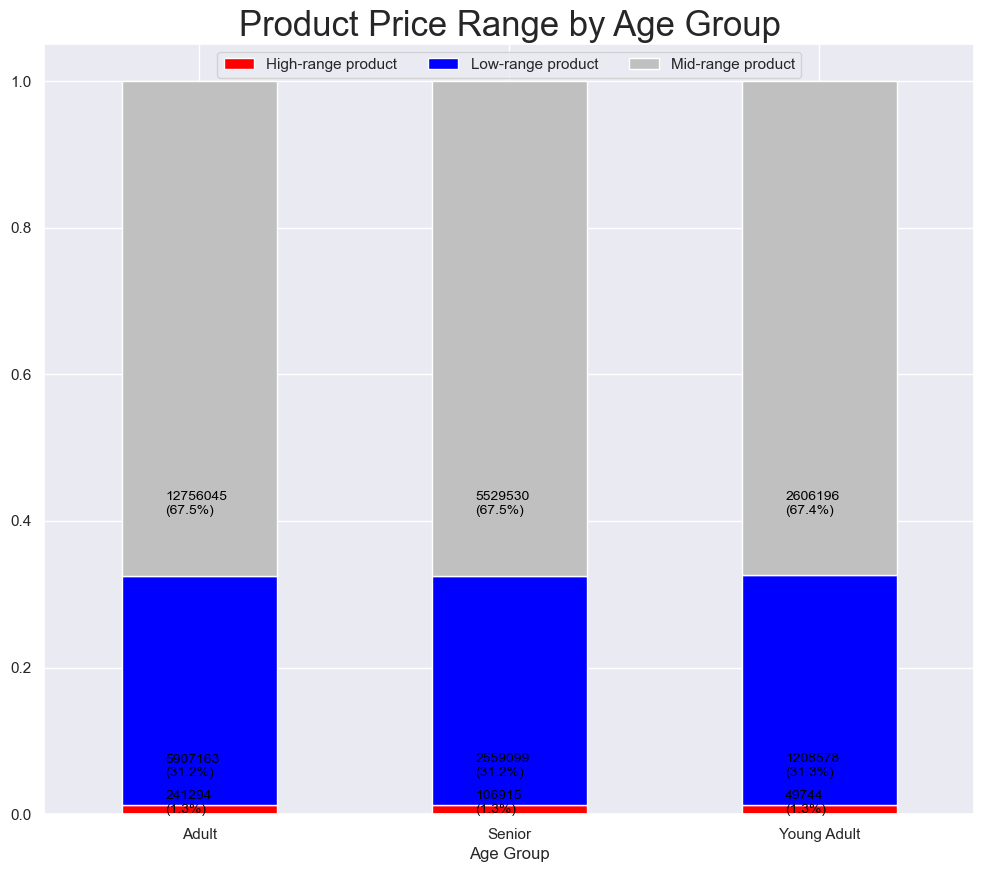

In [134]:
#Creating stacked bar chart for Age group and price range
age_prices_stacked=age_prices.plot(kind='bar', 
                        stacked=True, 
                        color=['red','blue','silver'], 
                        figsize=(12,10))

plt.title('Product Price Range by Age Group', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Age Group")


for n, y in enumerate([*age_prices_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_prices.loc[y],
                                         age_prices_labels.loc[y],
                                          age_prices.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 8),
                 x=n - 0.11,
                  #s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

age_prices_stacked.set_xticklabels(age_prices_stacked.get_xticklabels(), rotation=0)
plt.show()

In [135]:
# Export stacked bar Price Range by Age Group 
age_prices_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'product_prices_age_stacked.png'))

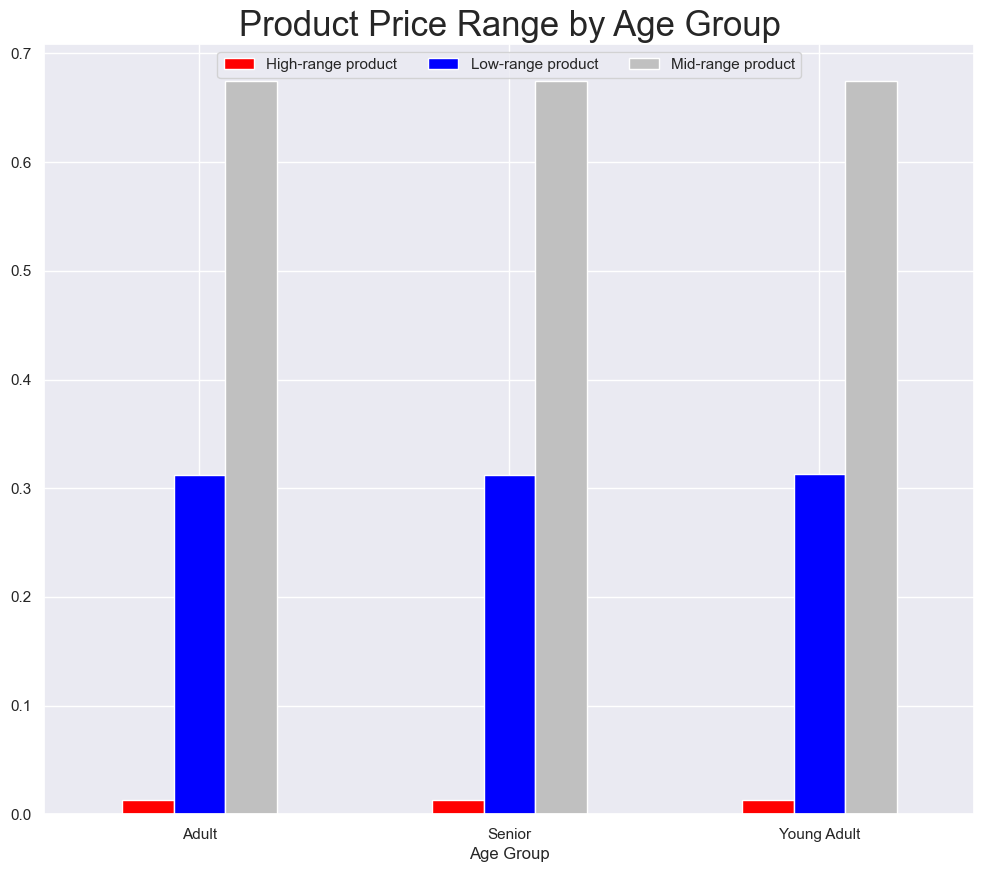

In [136]:
#creating bar chart Price Range by Age Group
age_prices_bar = age_prices.plot(kind='bar', 
                        stacked=False, 
                        color=['red','blue','silver'],
                        figsize=(12,10))
plt.title('Product Price Range by Age Group', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Age Group")
age_prices_bar.set_xticklabels(age_prices_bar.get_xticklabels(), rotation=0)
plt.show()

In [137]:
# Export bar Price Range by Age Group 
age_prices_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'product_prices_age_bar.png'))

#### Product Price Range by Customer Loyalty

In [138]:
# Creating crosstab for price and loyalty 
price_range_loyalty = pd.crosstab(index=df_active['price_range_loc'], columns=df_active['loyalty_flag'], normalize = "index")

In [139]:
# Creating cross tab to display labels
price_range_loyalty_labels=pd.crosstab(index=df_active['price_range_loc'],columns=df_active['loyalty_flag']) 

In [140]:
#Checking crosstab
price_range_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High-range product,0.301382,0.165665,0.532952
Low-range product,0.332273,0.155174,0.512552
Mid-range product,0.332641,0.154916,0.512442


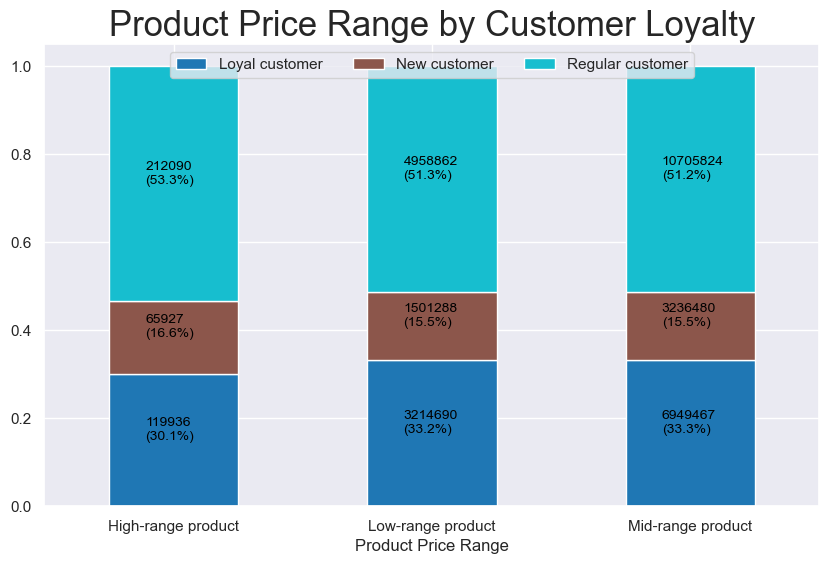

In [141]:
#Creating stacked bar chart for Age group and prices
price_range_loyalty_stacked=price_range_loyalty.plot(kind='bar', 
                        stacked=True, 
                        #color=['blue','red','silver'],
                        colormap='tab10',                            
                        figsize=(10,6))

plt.title('Product Price Range by Customer Loyalty', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Product Price Range")


for n, y in enumerate([*price_range_loyalty_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_loyalty.loc[y],
                                        price_range_loyalty_labels.loc[y],
                                          price_range_loyalty.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                #x=n -0.17,
                 x=n - 0.11,
                 #s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 #fontsize=12
                 fontsize=10)

price_range_loyalty_stacked.set_xticklabels(price_range_loyalty_stacked.get_xticklabels(), rotation=0)
plt.show()

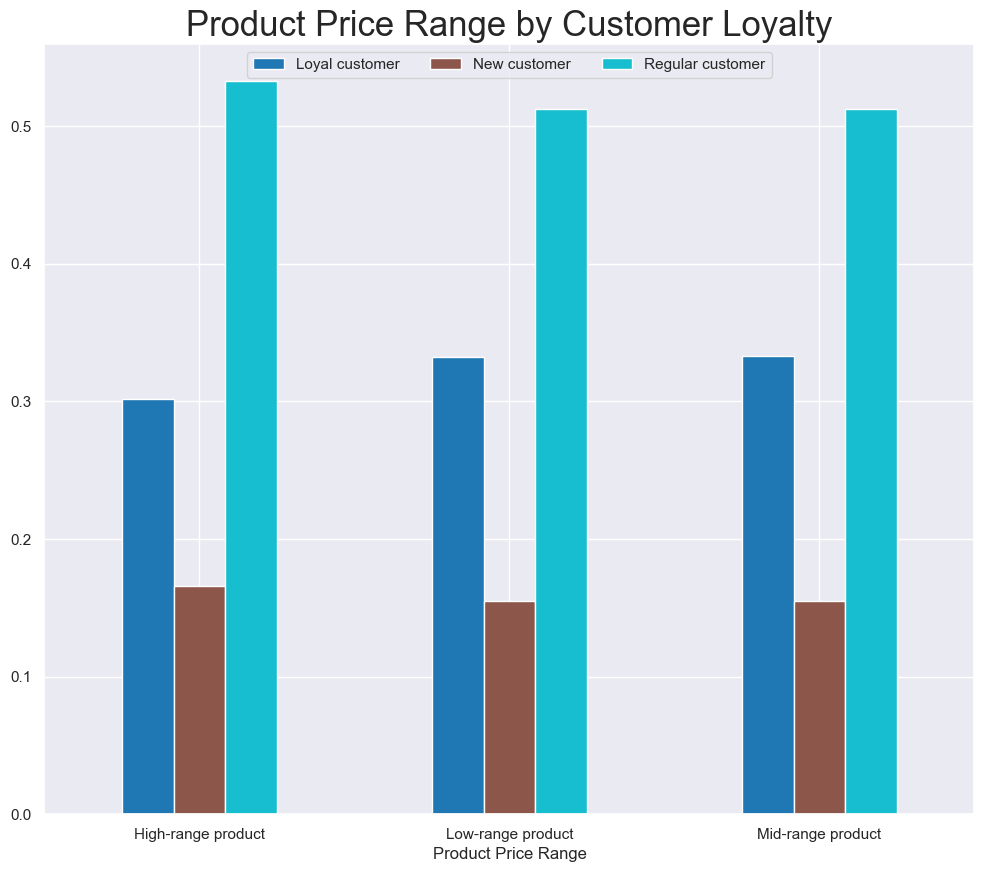

In [142]:
#creating bar chart for Product Price Range by Customer loyalty
price_range_loyalty_bar = price_range_loyalty.plot(kind = 'bar',
                        stacked=False,
                        colormap='tab10',               
                        figsize=(12,10))
plt.title( 'Product Price Range by Customer Loyalty', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Product Price Range")
price_range_loyalty_bar.set_xticklabels(price_range_loyalty_bar.get_xticklabels(), rotation=0)
plt.show()

In [143]:
# Export stacked bar Product Price Range by Customer Loyalty 
price_range_loyalty_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'price_range_loyalty_stacked.png'))

In [144]:
# Export bar Product Price Range by Customer Loyalty  
price_range_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'price_range_loyalty_bar.png'))

### Product Price Range Purchased by Marital Status 

In [145]:
#Creating crosstab for  marital/family stataus and prices 
family_prices=pd.crosstab(index=df_active['marital_status'], columns=df_active['price_range_loc'], normalize="index")

In [146]:
#creating cross tab to display labels
family_prices_labels=pd.crosstab(index=df_active['marital_status'],columns=df_active['price_range_loc'])

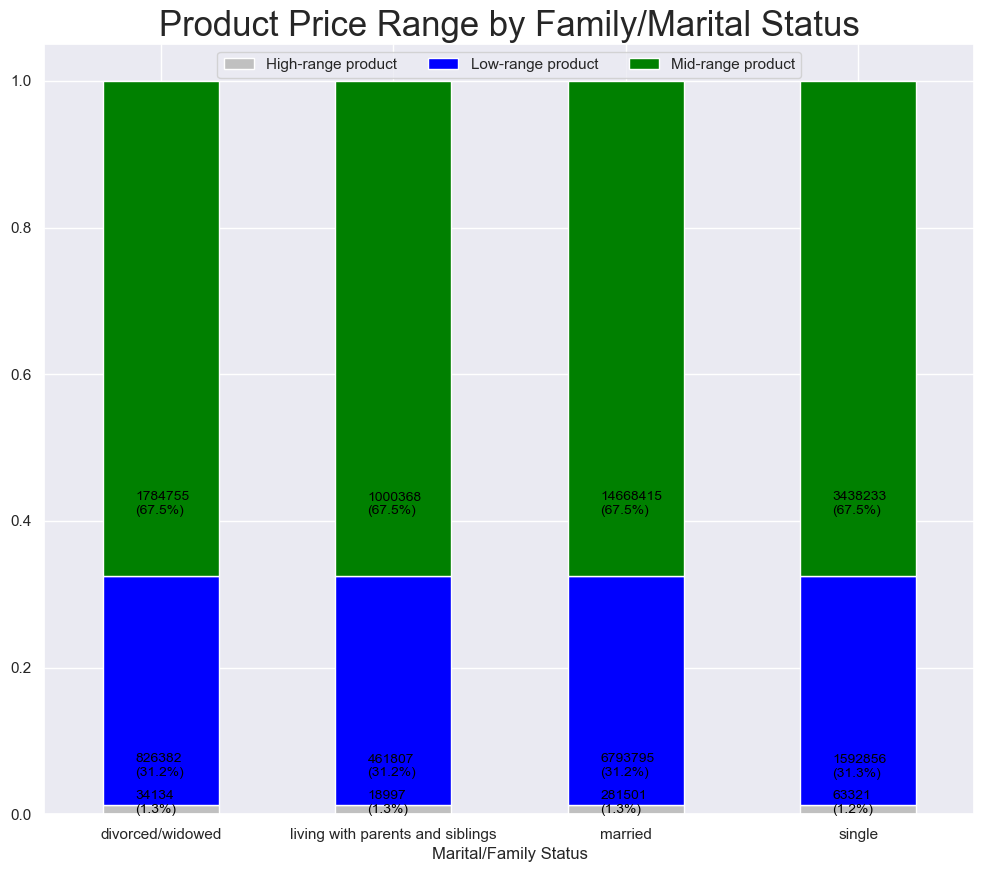

In [147]:
#Creating stacked bar chart for Marital/Family Status and Prices
family_prices_stacked=family_prices.plot(kind='bar', 
                        stacked=True, 
                        color=['silver','blue','green'], 
                        figsize=(12,10))

plt.title('Product Price Range by Family/Marital Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Marital/Family Status")


for n, y in enumerate([*family_prices_labels.index.values]):
    for (proportion, count, x_loc) in zip(family_prices.loc[y],
                                         family_prices_labels.loc[y],
                                          family_prices.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 8),
                 x=n - 0.11,
                  #s=f'{count}',
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

family_prices_stacked.set_xticklabels(family_prices_stacked.get_xticklabels(), rotation=0)
plt.show()

In [148]:
# Export stacked bar Product Price Range by Marital/Family status
family_prices_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'family_prices_stacked.png'))

In [149]:
z ### STOP HERE LOOK AT GENERAL VISUALS # 169 Scripts-checkpoint 

NameError: name 'z' is not defined

In [150]:
#Defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

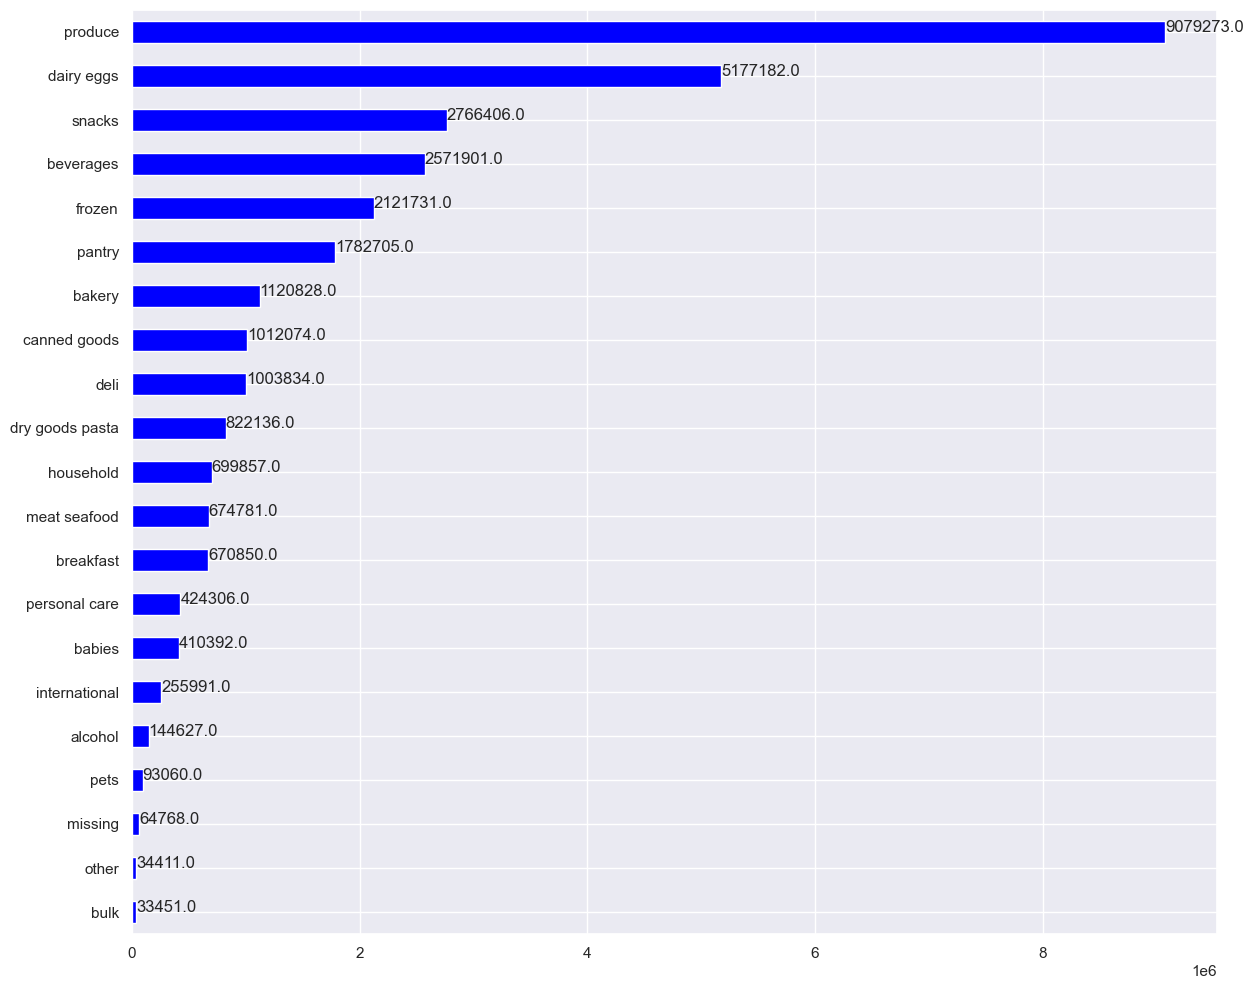

In [151]:
#Creating bar chart for orders made from each department
department_bar=df_active.department.value_counts().sort_values().plot(kind = 'barh',color=['blue'],figsize=[14,12])
show_values(department_bar, "h", space=0)

In [152]:
#Exporting horizontal bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'department_bar.png'))


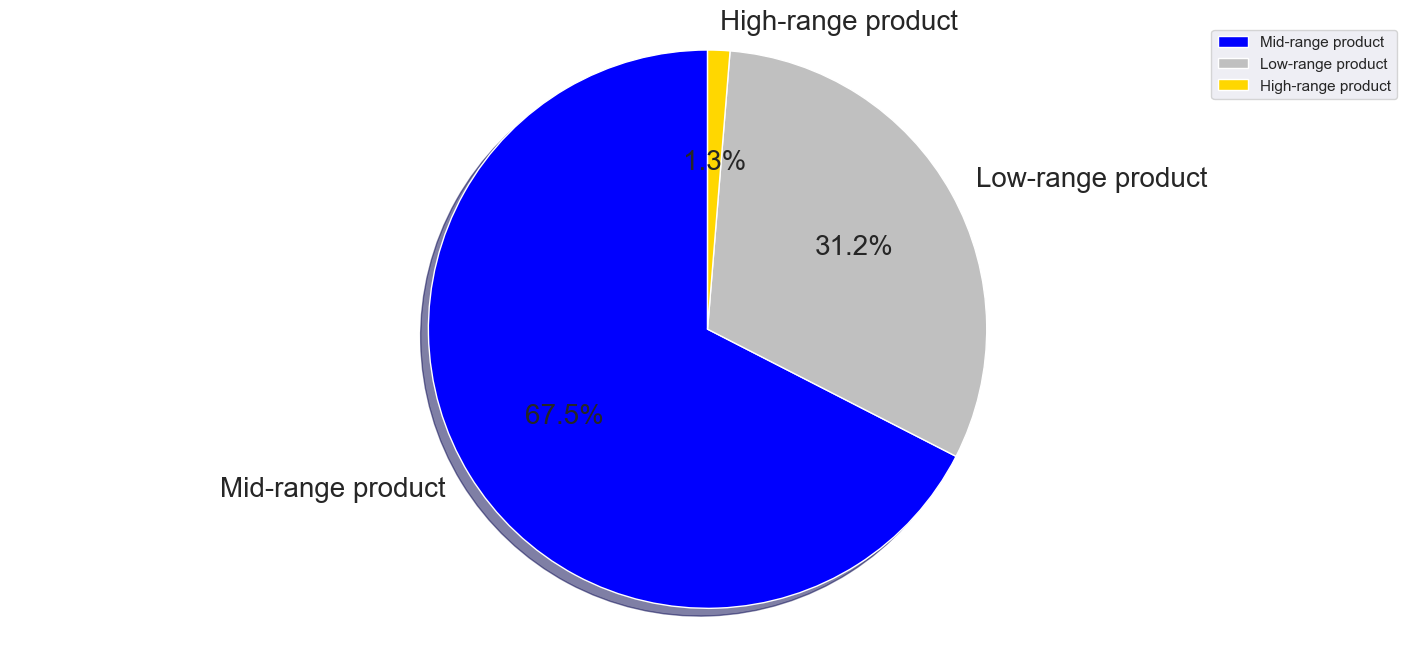

In [153]:
#Creating pie chart for price range distribution
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = df_active['price_range_loc'].value_counts()
colors = ['blue','silver','gold']
textprops = {"fontsize":20}

pricerange_pie, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()

In [154]:
#Export price range by products
pricerange_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'pricerange_pie.png'))

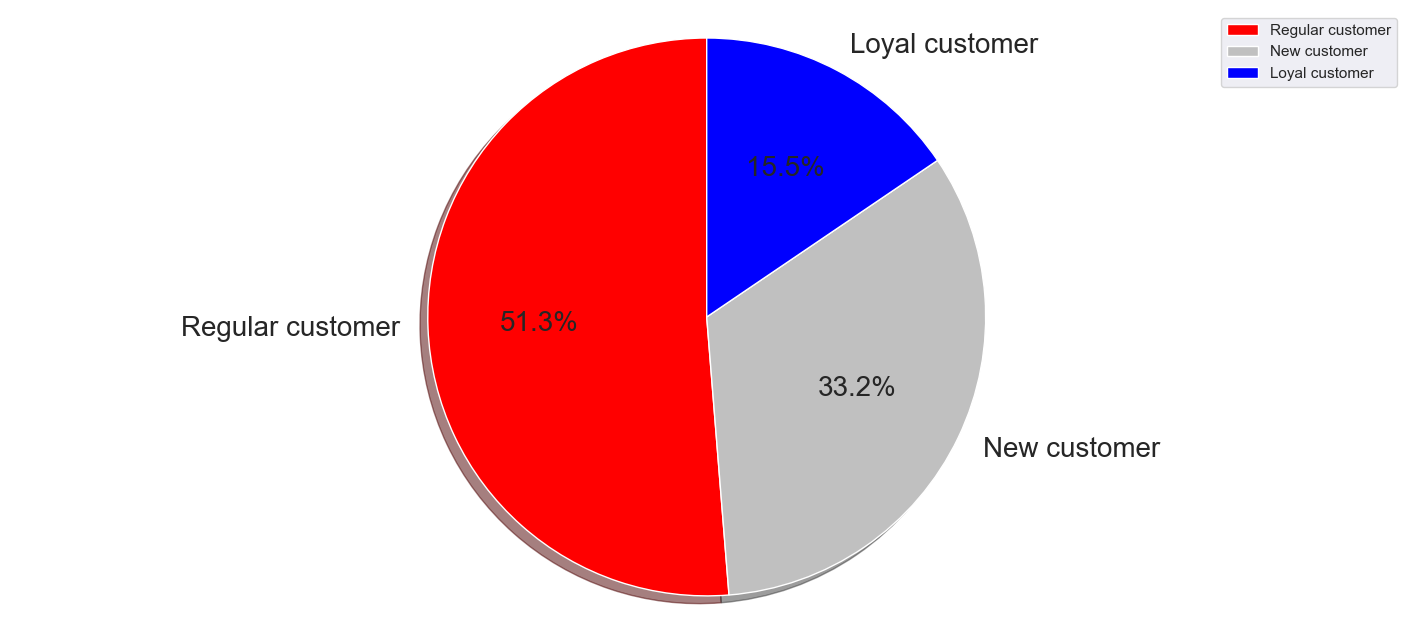

In [155]:
#Distribution of orders based on brand loyalty
labels = 'Regular customer', 'New customer', 'Loyal customer'
sizes = df_active['loyalty_flag'].value_counts()
colors = ['red','silver','blue']
textprops = {"fontsize":20}

loyalty_pie, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()

In [156]:
# Export Loyalty Pie
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','task 4.10', 'loyalty_pie.png'))

In [157]:
# Count loyal customers (New, Regular, Loyal)
df_active['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [158]:
#Difference in spending habits among customers based on loyalty flag
df_active.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773438  1.0  25.0
New customer      7.800781  1.0  25.0
Regular customer  7.796875  1.0  25.0

In [159]:
#Difference in order frequency among customers based on loyalty flag
df_active.groupby(['loyalty_flag']).agg({'median_days_since_previous_order':['mean', 'min', 'max']})

median_days_since_previous_order           
                                             mean  min   max
loyalty_flag                                                
Loyal customer                           5.171875  0.0  14.0
New customer                            18.031250  0.0  30.0
Regular customer                        10.609375  0.0  30.0

In [160]:
# Export df_active as final Instacart dataset

df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))
